0_neda_mimfpt_all_regression_models

Engin Abdan

### Import

In [22]:
import pandas as pd
import numpy as np
from numpy import percentile

import matplotlib.pyplot as plt
from matplotlib.pyplot import matplotlib
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import zscore

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline

import pickle

import sqlite3

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

### Data

In [23]:
df = pd.read_excel("std_ins_ml_data.xlsx")

### Data Info

In [24]:
df.head(2)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap
1,1,12,18,26,13,22,17,17,14,0,68,Spa


In [25]:
df = df.drop(columns=["Unnamed: 0","MI_Cat"], axis=1)
df.head(2)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95
1,12,18,26,13,22,17,17,14,0,68


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0
Flight_Mean,100.0,75.00,12.092238,55.0,63.75,75.0,86.0,98.0


In [27]:
type(df.corr())

pandas.core.frame.DataFrame

In [28]:
df.corr()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
Ling_Int,1.000000,-0.098162,0.000735,-0.068698,-0.103412,0.100587,0.012451,0.124741,-0.091313,-0.080307
Math_Int,-0.098162,1.000000,0.004761,0.263387,0.087905,-0.023801,0.087261,-0.080008,0.069636,0.072900
Spa_Int,0.000735,0.004761,1.000000,-0.043324,0.054084,0.043194,-0.010617,-0.079160,-0.207011,-0.180365
Mus_Int,-0.068698,0.263387,-0.043324,1.000000,0.006284,-0.057392,-0.014819,-0.171671,0.072790,0.061492
Nat_Int,-0.103412,0.087905,0.054084,0.006284,1.000000,-0.216582,-0.202071,-0.102470,-0.050514,-0.090658
Body_Int,0.100587,-0.023801,0.043194,-0.057392,-0.216582,1.000000,0.197179,0.019206,-0.073203,-0.005005
Interp_Int,0.012451,0.087261,-0.010617,-0.014819,-0.202071,0.197179,1.000000,0.086464,-0.058546,0.048383
Intrap_Int,0.124741,-0.080008,-0.079160,-0.171671,-0.102470,0.019206,0.086464,1.000000,-0.071244,-0.037186
Plt_Or_Not,-0.091313,0.069636,-0.207011,0.072790,-0.050514,-0.073203,-0.058546,-0.071244,1.000000,0.867250
Flight_Mean,-0.080307,0.072900,-0.180365,0.061492,-0.090658,-0.005005,0.048383,-0.037186,0.867250,1.000000


In [29]:
a = []
b = []
for i in df.corr().columns:
    for k in df.corr().loc[:,i]:
        if abs(k) >= 0.9:
            a.append(k)
        else:
            b.append(k)
print(f"Strong_Corr \t: {a}" )
print(f"Weak_Corr \t: {b}" )

Strong_Corr 	: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Weak_Corr 	: [-0.09816177013828017, 0.0007345371969964949, -0.06869758318601726, -0.10341241733168519, 0.10058716704061625, 0.012450765314076791, 0.12474118582100657, -0.09131340981215223, -0.08030683262756651, -0.09816177013828017, 0.00476069688227437, 0.2633867913064584, 0.08790512890900118, -0.023800528475231113, 0.08726130236731322, -0.080007990412849, 0.06963578663429645, 0.07289999704889377, 0.0007345371969964949, 0.00476069688227437, -0.04332371252478464, 0.05408424555732783, 0.04319435622124602, -0.010617072664902864, -0.07915988683685925, -0.20701074274195216, -0.18036477258454398, -0.06869758318601726, 0.2633867913064584, -0.04332371252478464, 0.006284241754908033, -0.057391533213293315, -0.014819307828657707, -0.17167099025671959, 0.07279043658679342, 0.06149210698189992, -0.10341241733168519, 0.08790512890900118, 0.05408424555732783, 0.006284241754908033, -0.21658244632805532, -0.20207143994751595, -0.1024704

In [30]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


In [31]:
df.Plt_Or_Not.unique()

array([1, 0], dtype=int64)

In [32]:
df.Plt_Or_Not.value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

In [33]:
df.Flight_Mean.unique()

array([95, 68, 87, 66, 62, 84, 63, 58, 77, 75, 74, 79, 88, 89, 67, 59, 76,
       65, 96, 73, 61, 60, 57, 91, 80, 72, 93, 64, 97, 86, 78, 92, 90, 56,
       55, 85, 98, 83], dtype=int64)

In [34]:
df.Flight_Mean.nunique()

38

In [35]:
len(df)

100

In [36]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


### Regression Train Test

In [37]:
from sklearn.model_selection import train_test_split

X_reg = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y_reg = df["Flight_Mean"]
print(f"X_reg_shape \t: {X_reg.shape}")
print(f"y_reg_shape \t: {y_reg.shape}")
print("-"*40)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
print(f"X_reg_tain_shape \t: {X_reg_train.shape}")
print(f"X_reg_test_shape \t: {X_reg_test.shape}")
print(f"y_reg_tain_shape \t: {y_reg_train.shape}")
print(f"y_reg_test_shape \t: {y_reg_test.shape}")

X_reg_shape 	: (100, 8)
y_reg_shape 	: (100,)
----------------------------------------
X_reg_tain_shape 	: (70, 8)
X_reg_test_shape 	: (30, 8)
y_reg_tain_shape 	: (70,)
y_reg_test_shape 	: (30,)


### Classification Train Test

In [38]:
from sklearn.model_selection import train_test_split

X_cls = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y_cls = df["Flight_Mean"]
print(f"X_cls_shape \t: {X_cls.shape}")
print(f"y_cls_shape \t: {y_cls.shape}")
print("-"*40)

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
print(f"X_cls_tain_shape \t: {X_cls_train.shape}")
print(f"X_cls_test_shape \t: {X_cls_test.shape}")
print(f"y_cls_tain_shape \t: {y_cls_train.shape}")
print(f"y_cls_test_shape \t: {y_cls_test.shape}")

X_cls_shape 	: (100, 8)
y_cls_shape 	: (100,)
----------------------------------------
X_cls_tain_shape 	: (70, 8)
X_cls_test_shape 	: (30, 8)
y_cls_tain_shape 	: (70,)
y_cls_test_shape 	: (30,)


### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [40]:
# MinMaxScaler for X_reg data
scaler_reg_min = MinMaxScaler()
X_reg_train_min_scl = scaler_reg_min.fit_transform(X_reg_train)
X_reg_test_min_scl = scaler_reg_min.transform(X_reg_test)

# StandardScaler for X_reg data
scaler_reg_std = StandardScaler()
X_reg_train_std_scl = scaler_reg_std.fit_transform(X_reg_train)
X_reg_test_std_scl = scaler_reg_std.transform(X_reg_test)

In [41]:
# MinMaxScaler for X_cls data
scaler_cls_min = MinMaxScaler ()
X_cls_train_min_scl = scaler_cls_min.fit_transform(X_cls_train)
X_cls_test_min_scl = scaler_cls_min.transform(X_cls_test)

# StandardScaler for X_cls data
scaler_cls_std = StandardScaler()
X_cls_train_std_scl = scaler_cls_std.fit_transform(X_cls_train)
X_cls_test_std_scl = scaler_cls_std.transform(X_cls_test)

### Polyfit

In [42]:
X_reg.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,20,19,10,16,13,16,17,22


In [43]:
def check_dist(X_reg, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=X_reg)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()

In [44]:
# for col in X_reg.columns:
#     check_dist(X_reg, col)

In [45]:
np.polyfit(X_reg.Ling_Int, y_reg, deg=3)
# b3--b2--b1--b0

array([-2.79738009e-02,  1.49097858e+00, -2.61369025e+01,  2.25688430e+02])

### PolynomialFeatures

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=3, include_bias=False)
poly_data = poly_trans.fit_transform(X_reg)
print(poly_data.shape)
print(X_reg.shape)

(100, 164)
(100, 8)


## Linear Regression

### Linear Regression

In [47]:
# lin_model for X_reg (Not Scaled)

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = lin_mod.predict(X_reg_test)
y_reg_train_prd = lin_mod.predict(X_reg_train)

In [48]:
lin_mod_scores = {"lm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                             "R2" : r2_score(y_reg_train, y_reg_train_prd),
                             "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                             "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "lm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                             "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                             "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                             "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

lin_mod_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_scrs

,lm_trn,lm_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [29]:
# lin_model for MinMaxScaler

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = lin_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = lin_mod.predict(X_reg_train_min_scl)

In [30]:
lin_mod_scores = {"lm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "lm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

lin_mod_min_scl_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_min_scl_scrs

,lm_mms_trn,lm_mms_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [31]:
# lin_model for StandardScaler

from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()
lin_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = lin_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = lin_mod.predict(X_reg_train_std_scl)

In [32]:
lin_mod_scores = {"lm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "lm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

lin_mod_std_scl_scrs =pd.DataFrame(lin_mod_scores)
lin_mod_std_scl_scrs

,lm_ss_trn,lm_ss_tst
rmse,11.866705,12.443221
R2,0.023046,-0.135987
mae,10.110832,11.230958
mse,140.818691,154.833760


In [33]:
lin_mod_scrs = pd.concat([lin_mod_scrs, lin_mod_min_scl_scrs, lin_mod_std_scl_scrs], axis=1)
lin_mod_scrs

,lm_trn,lm_tst,lm_mms_trn,lm_mms_tst,lm_ss_trn,lm_ss_tst
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760


### Linear Regression & CV

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_cv = cross_validate(lin_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_mms_cv = cross_validate(lin_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
lin_mod_cv = LinearRegression()
scores_ss_cv = cross_validate(lin_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.537990
test_r2                              -0.816103
test_neg_mean_absolute_error        -11.886741
test_neg_mean_squared_error        -188.530002
dtype: float64

In [37]:
lin_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
lin_mod_cv_scrs.rename(columns={0:"lm_cv_scr",
                                1:"lm_cv_mms_scr",
                                2:"lm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
lin_mod_cv_scrs

,lm_cv_scr,lm_cv_mms_scr,lm_cv_ss_scr
rmse,-13.537990,-13.537990,-13.537990
R2,-0.816103,-0.816103,-0.816103
mae,-11.886741,-11.886741,-11.886741
mse,-188.530002,-188.530002,-188.530002


In [38]:
lin_mod_cum_scrs = pd.concat([lin_mod_scrs, lin_mod_cv_scrs], axis=1)
lin_mod_cum_scrs.columns = ["lm_trn","lm_tst","lm_cv_scr","lm_mms_trn","lm_mms_tst","lm_cv_mms_scr","lm_ss_trn","lm_ss_tst","lm_cv_ss_scr"]
lin_mod_cum_scrs

,lm_trn,lm_tst,lm_cv_scr,lm_mms_trn,lm_mms_tst,lm_cv_mms_scr,lm_ss_trn,lm_ss_tst,lm_cv_ss_scr
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221,-13.537990,-13.537990,-13.537990
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987,-0.816103,-0.816103,-0.816103
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958,-11.886741,-11.886741,-11.886741
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760,-188.530002,-188.530002,-188.530002


## Ridge

### Ridge

In [39]:
# rid_mod for X_reg (Not scaled)
from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = rid_mod.predict(X_reg_test)
y_reg_train_prd = rid_mod.predict(X_reg_train)

In [40]:
rid_mod_scores = {"rm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                             "R2" : r2_score(y_reg_train, y_reg_train_prd),
                             "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                             "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "rm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                             "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                             "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                             "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

rid_mod_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_scrs

,rm_trn,rm_tst
rmse,11.866706,12.442072
R2,0.023046,-0.135777
mae,10.111488,11.230004
mse,140.818708,154.805150


In [41]:
# rid_model for MinMaxScaler

from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = rid_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = rid_mod.predict(X_reg_train_min_scl)

In [42]:
rid_mod_scores = {"rm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "rm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

rid_mod_min_scl_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_min_scl_scrs

,rm_mms_trn,rm_mms_tst
rmse,11.876752,12.323480
R2,0.021391,-0.114229
mae,10.184354,11.119722
mse,141.057235,151.868147


In [43]:
# rid_model for StandardScaler

from sklearn.linear_model import Ridge
rid_mod = Ridge(random_state=42)
rid_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = rid_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = rid_mod.predict(X_reg_train_std_scl)

In [44]:
rid_mod_scores = {"rm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "rm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

rid_mod_std_scl_scrs =pd.DataFrame(rid_mod_scores)
rid_mod_std_scl_scrs

,rm_ss_trn,rm_ss_tst
rmse,11.866749,12.435051
R2,0.023039,-0.134496
mae,10.116205,11.224120
mse,140.819743,154.630492


In [45]:
rid_mod_scrs = pd.concat([rid_mod_scrs, rid_mod_min_scl_scrs, rid_mod_std_scl_scrs], axis=1)
rid_mod_scrs

,rm_trn,rm_tst,rm_mms_trn,rm_mms_tst,rm_ss_trn,rm_ss_tst
rmse,11.866706,12.442072,11.876752,12.323480,11.866749,12.435051
R2,0.023046,-0.135777,0.021391,-0.114229,0.023039,-0.134496
mae,10.111488,11.230004,10.184354,11.119722,10.116205,11.224120
mse,140.818708,154.805150,141.057235,151.868147,140.819743,154.630492


### Ridge & CV

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
rid_mod_cv = Ridge(random_state=42)
scores_cv = cross_validate(rid_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.534107
test_r2                              -0.815150
test_neg_mean_absolute_error        -11.883674
test_neg_mean_squared_error        -188.409468
dtype: float64

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
lin_mod_cv = Ridge(random_state=42)
scores_mms_cv = cross_validate(rid_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.989429
test_r2                              -0.689601
test_neg_mean_absolute_error        -11.417533
test_neg_mean_squared_error        -172.474116
dtype: float64

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
rid_mod_cv = Ridge(random_state=42)
scores_ss_cv = cross_validate(rid_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.500902
test_r2                              -0.807147
test_neg_mean_absolute_error        -11.856837
test_neg_mean_squared_error        -187.392816
dtype: float64

In [49]:
rid_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
rid_mod_cv_scrs.rename(columns={0:"rm_cv_scr",
                                1:"rm_cv_mms_scr",
                                2:"rm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
rid_mod_cv_scrs

,rm_cv_scr,rm_cv_mms_scr,rm_cv_ss_scr
rmse,-13.534107,-12.989429,-13.500902
R2,-0.815150,-0.689601,-0.807147
mae,-11.883674,-11.417533,-11.856837
mse,-188.409468,-172.474116,-187.392816


In [50]:
rid_mod_cum_scrs = pd.concat([rid_mod_scrs, rid_mod_cv_scrs], axis=1)
rid_mod_cum_scrs.columns = ["rm_trn","rm_tst","rm_cv_scr","rm_mms_trn","rm_mms_tst","rm_cv_mms_scr","rm_ss_trn","rm_ss_tst","rm_cv_ss_scr"]
rid_mod_cum_scrs

,rm_trn,rm_tst,rm_cv_scr,rm_mms_trn,rm_mms_tst,rm_cv_mms_scr,rm_ss_trn,rm_ss_tst,rm_cv_ss_scr
rmse,11.866706,12.442072,11.876752,12.323480,11.866749,12.435051,-13.534107,-12.989429,-13.500902
R2,0.023046,-0.135777,0.021391,-0.114229,0.023039,-0.134496,-0.815150,-0.689601,-0.807147
mae,10.111488,11.230004,10.184354,11.119722,10.116205,11.224120,-11.883674,-11.417533,-11.856837
mse,140.818708,154.805150,141.057235,151.868147,140.819743,154.630492,-188.409468,-172.474116,-187.392816


### Ridge & GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rid_mod_grd = Ridge(random_state=42)
alpha_space = np.linspace(0,1,100)
param_grid = {"alpha":alpha_space}
grid_model = GridSearchCV(estimator=rid_mod_grd,
                          param_grid=param_grid,
                          cv=10,
                          verbose=2,
                          scoring="neg_root_mean_squared_error")

In [52]:
grid_model.fit(X_reg_train, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [53]:
grid_model.fit(X_reg_train_min_scl, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [54]:
grid_model.fit(X_reg_train_std_scl, y_reg_train)
grid_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

{'alpha': 1.0}

In [55]:
rid_cv_mod = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')
rid_cv_mod.fit(X_reg_train,y_reg_train)
rid_cv_mod.alpha_

1.0

### Ridge & Feature Importance

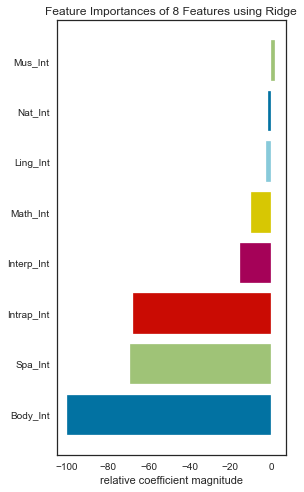

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [56]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(rid_mod_cv, labels=pd.DataFrame(X_reg_train).columns)
visualizer = RadViz(size=(300, 500))
viz.fit(X_reg_train, y_reg_train)
viz.show()

## Lasso

### Lasso

In [57]:
from sklearn.linear_model import LassoCV
alpha_space = np.linspace(0,1,100)
las_cv_mod = LassoCV(alphas=alpha_space, cv = 10, max_iter=10000, n_jobs=-1)
las_cv_mod.fit(X_reg_train, y_reg_train)
las_cv_mod.alpha_

1.0

In [58]:
# las_mod for X_reg (Not scaled)
from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = las_mod.predict(X_reg_test)
y_reg_train_prd = las_mod.predict(X_reg_train)

In [59]:
las_mod_scores = {"lsm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                              "R2" : r2_score(y_reg_train, y_reg_train_prd),
                              "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                              "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "lsm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                              "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                              "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                              "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

las_mod_scrs =pd.DataFrame(las_mod_scores)
las_mod_scrs

,lsm_trn,lsm_tst
rmse,11.889079,12.297299
R2,0.019359,-0.109500
mae,10.207016,11.102959
mse,141.350203,151.223561


In [60]:
# las_model for MinMaxScaler

from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = las_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = las_mod.predict(X_reg_train_min_scl)

In [61]:
las_mod_scores = {"lsm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "lsm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

las_mod_min_scl_scrs =pd.DataFrame(las_mod_scores)
las_mod_min_scl_scrs

,lsm_mms_trn,lsm_mms_tst
rmse,12.005857,12.265839
R2,0.000000,-0.103830
mae,10.360816,11.000952
mse,144.140612,150.450816


In [62]:
# las_model for StandardScaler

from sklearn.linear_model import Lasso
las_mod = Lasso(max_iter=10000, random_state=42)
las_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = las_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = las_mod.predict(X_reg_train_std_scl)

In [63]:
las_mod_scores = {"lsm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "lsm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                 "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                 "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                 "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

las_mod_std_scl_scrs =pd.DataFrame(las_mod_scores)
las_mod_std_scl_scrs

,lsm_ss_trn,lsm_ss_tst
rmse,11.993267,12.295498
R2,0.002096,-0.109175
mae,10.350003,11.026049
mse,143.838442,151.179275


In [64]:
las_mod_scrs = pd.concat([las_mod_scrs, las_mod_min_scl_scrs, las_mod_std_scl_scrs], axis=1)
las_mod_scrs

,lsm_trn,lsm_tst,lsm_mms_trn,lsm_mms_tst,lsm_ss_trn,lsm_ss_tst
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275


### Lasso & CV

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_cv = cross_validate(las_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.040731
test_r2                              -0.706249
test_neg_mean_absolute_error        -11.481504
test_neg_mean_squared_error        -173.954235
dtype: float64

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_mms_cv = cross_validate(las_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.131923
test_r2                              -0.519086
test_neg_mean_absolute_error        -10.580499
test_neg_mean_squared_error        -149.538977
dtype: float64

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
las_mod_cv = Lasso(max_iter=10000, random_state=42)
scores_ss_cv = cross_validate(rid_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.500902
test_r2                              -0.807147
test_neg_mean_absolute_error        -11.856837
test_neg_mean_squared_error        -187.392816
dtype: float64

In [68]:
las_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
las_mod_cv_scrs.rename(columns={0:"lsm_cv_scr",
                                1:"lsm_cv_mms_scr",
                                2:"lsm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
las_mod_cv_scrs

,lsm_cv_scr,lsm_cv_mms_scr,lsm_cv_ss_scr
rmse,-13.040731,-12.131923,-13.500902
R2,-0.706249,-0.519086,-0.807147
mae,-11.481504,-10.580499,-11.856837
mse,-173.954235,-149.538977,-187.392816


In [69]:
las_mod_cum_scrs = pd.concat([las_mod_scrs, las_mod_cv_scrs], axis=1)
las_mod_cum_scrs.columns = ["lsm_trn","lsm_tst","lsm_cv_scr","lsm_mms_trn","lsm_mms_tst","lsm_cv_mms_scr","lsm_ss_trn","lsm_ss_tst","lsm_cv_ss_scr"]
las_mod_cum_scrs

,lsm_trn,lsm_tst,lsm_cv_scr,lsm_mms_trn,lsm_mms_tst,lsm_cv_mms_scr,lsm_ss_trn,lsm_ss_tst,lsm_cv_ss_scr
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498,-13.040731,-12.131923,-13.500902
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175,-0.706249,-0.519086,-0.807147
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049,-11.481504,-10.580499,-11.856837
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275,-173.954235,-149.538977,-187.392816


### Lasso & Feature Importance

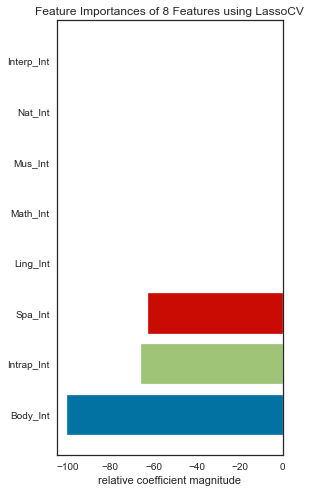

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [70]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(las_cv_mod, labels=pd.DataFrame(X_reg_train).columns)
visualizer = RadViz(size=(300, 500))
viz.fit(X_reg_train, y_reg_train)
viz.show()

## ElasticNet

### ElasticNet & GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
els_mod_grd = ElasticNet()
param_grid = {"alpha":[0.2, 0.3, 0.5, 0.8, 1.0], "l1_ratio":[0.5, 0.8, 1.0]}
grid_model = GridSearchCV(estimator=els_mod_grd,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs=-1,
                          scoring="neg_root_mean_squared_error")
grid_model.fit(X_reg_train, y_reg_train)
grid_model.best_estimator_

ElasticNet(l1_ratio=1.0)

In [72]:
# els_mod for X_reg (Not scaled)
from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = els_mod.predict(X_reg_test)
y_reg_train_prd = els_mod.predict(X_reg_train)

In [73]:
els_mod_scores = {"elsm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "elsm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

els_mod_scrs =pd.DataFrame(els_mod_scores)
els_mod_scrs

,elsm_trn,elsm_tst
rmse,11.889079,12.297299
R2,0.019359,-0.109500
mae,10.207016,11.102959
mse,141.350203,151.223561


In [74]:
# els_model for MinMaxScaler

from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = els_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = els_mod.predict(X_reg_train_min_scl)

In [75]:
els_mod_scores = {"elsm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "elsm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

els_mod_min_scl_scrs =pd.DataFrame(els_mod_scores)
els_mod_min_scl_scrs

,elsm_mms_trn,elsm_mms_tst
rmse,12.005857,12.265839
R2,0.000000,-0.103830
mae,10.360816,11.000952
mse,144.140612,150.450816


In [76]:
# els_model for StandardScaler

from sklearn.linear_model import ElasticNet
els_mod = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
els_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = els_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = els_mod.predict(X_reg_train_std_scl)

In [77]:
els_mod_scores = {"elsm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "elsm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

els_mod_std_scl_scrs =pd.DataFrame(els_mod_scores)
els_mod_std_scl_scrs

,elsm_ss_trn,elsm_ss_tst
rmse,11.993267,12.295498
R2,0.002096,-0.109175
mae,10.350003,11.026049
mse,143.838442,151.179275


In [78]:
els_mod_scrs = pd.concat([els_mod_scrs, els_mod_min_scl_scrs, els_mod_std_scl_scrs], axis=1)
els_mod_scrs

,elsm_trn,elsm_tst,elsm_mms_trn,elsm_mms_tst,elsm_ss_trn,elsm_ss_tst
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275


### ElasticNet & CV

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_cv = cross_validate(els_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.040731
test_r2                              -0.706249
test_neg_mean_absolute_error        -11.481504
test_neg_mean_squared_error        -173.954235
dtype: float64

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_mms_cv = cross_validate(els_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.131923
test_r2                              -0.519086
test_neg_mean_absolute_error        -10.580499
test_neg_mean_squared_error        -149.538977
dtype: float64

In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
els_mod_cv = ElasticNet(l1_ratio=1.0, max_iter=10000, random_state=42)
scores_ss_cv = cross_validate(els_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.388180
test_r2                              -0.572926
test_neg_mean_absolute_error        -10.838855
test_neg_mean_squared_error        -156.118854
dtype: float64

In [82]:
els_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
els_mod_cv_scrs.rename(columns={0:"elsm_cv_scr",
                                1:"elsm_cv_mms_scr",
                                2:"elsm_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
els_mod_cv_scrs

,elsm_cv_scr,elsm_cv_mms_scr,elsm_cv_ss_scr
rmse,-13.040731,-12.131923,-12.388180
R2,-0.706249,-0.519086,-0.572926
mae,-11.481504,-10.580499,-10.838855
mse,-173.954235,-149.538977,-156.118854


In [83]:
els_mod_cum_scrs = pd.concat([els_mod_scrs, els_mod_cv_scrs], axis=1)
els_mod_cum_scrs.columns = ["elsm_trn","elsm_tst","elsm_cv_scr","elsm_mms_trn","elsm_mms_tst","elsm_cv_mms_scr","elsm_ss_trn","elsm_ss_tst","elsm_cv_ss_scr"]
els_mod_cum_scrs

,elsm_trn,elsm_tst,elsm_cv_scr,elsm_mms_trn,elsm_mms_tst,elsm_cv_mms_scr,elsm_ss_trn,elsm_ss_tst,elsm_cv_ss_scr
rmse,11.889079,12.297299,12.005857,12.265839,11.993267,12.295498,-13.040731,-12.131923,-12.388180
R2,0.019359,-0.109500,0.000000,-0.103830,0.002096,-0.109175,-0.706249,-0.519086,-0.572926
mae,10.207016,11.102959,10.360816,11.000952,10.350003,11.026049,-11.481504,-10.580499,-10.838855
mse,141.350203,151.223561,144.140612,150.450816,143.838442,151.179275,-173.954235,-149.538977,-156.118854


## KNN

### KNNR Best "k" & Error

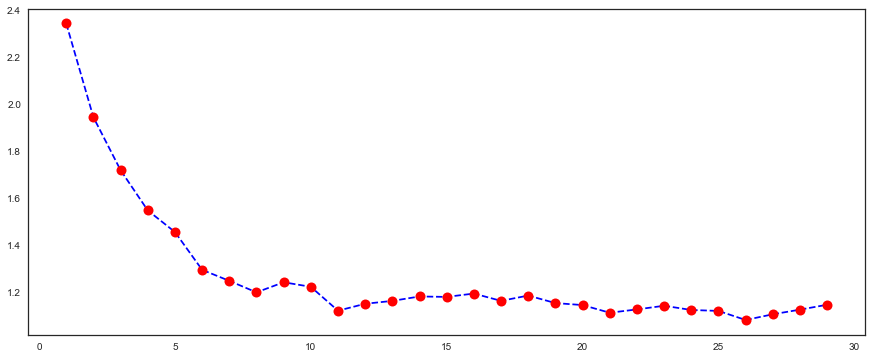

In [84]:
# Best "k" With NoScale Data
# Best "k" = 8  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train, y_reg_train)    
    pred = knn_model.predict(X_reg_test)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

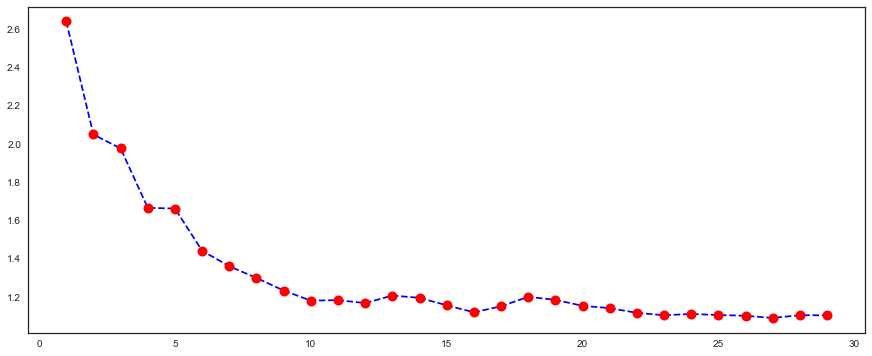

In [85]:
# Best "k" With MinMaxScale Data
# Best "k" = 4  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train_min_scl, y_reg_train)    
    pred = knn_model.predict(X_reg_test_min_scl)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

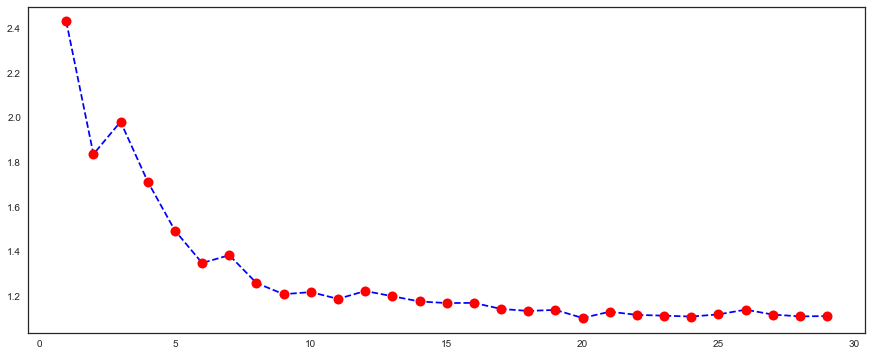

In [86]:
# Best "k" With MinMaxScale Data
# Best "k" = 6  

from sklearn.neighbors import KNeighborsRegressor
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsRegressor(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_reg_train_std_scl, y_reg_train)    
    pred = knn_model.predict(X_reg_test_std_scl)
    test_error = 1 - r2_score(y_reg_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)

### KNNR Best "k" & GridSearchCV

In [87]:
# Best "k" With NoScale Data
# Best Params = {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [88]:
# Best "k" With MinMaxScale Data
# Best Params = {'n_neighbors': 24, 'p': 1, 'weights': 'uniform'} 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train_min_scl, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

In [89]:
# Best "k" With StandadScale Data
# Best Params = {'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsRegressor()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'r2')
knn_grid_model.fit(X_reg_train_std_scl, y_reg_train)
knn_grid_model.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

### KNNR

In [90]:
# knnr_mod for X_reg (Not scaled)
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = knnr_mod.predict(X_reg_test)
y_reg_train_prd = knnr_mod.predict(X_reg_train)

In [91]:
knnr_mod_scores = {"knnrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "knnrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

knnr_mod_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_scrs

,knnrm_trn,knnrm_tst
rmse,10.682429,14.512997
R2,0.208313,-0.545332
mae,9.085714,12.441667
mse,114.114286,210.627083


In [92]:
# knnr_model for MinMaxScaler
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = knnr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = knnr_mod.predict(X_reg_train_min_scl)

In [93]:
knnr_mod_scores = {"knnrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "knnrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

knnr_mod_min_scl_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_min_scl_scrs

,knnrm_mms_trn,knnrm_mms_tst
rmse,10.415819,15.058635
R2,0.247337,-0.663715
mae,8.735714,12.450000
mse,108.489286,226.762500


In [94]:
# knnr_model for StandardScaler
# {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

from sklearn.neighbors import KNeighborsRegressor
knnr_mod = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
knnr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = knnr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = knnr_mod.predict(X_reg_train_std_scl)

In [95]:
knnr_mod_scores = {"knnrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "knnrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

knnr_mod_std_scl_scrs =pd.DataFrame(knnr_mod_scores)
knnr_mod_std_scl_scrs

,knnrm_ss_trn,knnrm_ss_tst
rmse,10.470494,15.271706
R2,0.239415,-0.711129
mae,8.817857,13.183333
mse,109.631250,233.225000


In [96]:
knnr_mod_scrs = pd.concat([knnr_mod_scrs, knnr_mod_min_scl_scrs, knnr_mod_std_scl_scrs], axis=1)
knnr_mod_scrs

,knnrm_trn,knnrm_tst,knnrm_mms_trn,knnrm_mms_tst,knnrm_ss_trn,knnrm_ss_tst
rmse,10.682429,14.512997,10.415819,15.058635,10.470494,15.271706
R2,0.208313,-0.545332,0.247337,-0.663715,0.239415,-0.711129
mae,9.085714,12.441667,8.735714,12.450000,8.817857,13.183333
mse,114.114286,210.627083,108.489286,226.762500,109.631250,233.225000


### KNNR & CV

In [97]:
# knnr_mod & CV for X_reg (Not scaled)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_cv = cross_validate(knnr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.784720
test_r2                              -0.598503
test_neg_mean_absolute_error        -10.996429
test_neg_mean_squared_error        -167.338393
dtype: float64

In [98]:
# knnr_model & CV for MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_mms_cv = cross_validate(knnr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.887438
test_r2                              -0.610492
test_neg_mean_absolute_error        -11.200000
test_neg_mean_squared_error        -168.746429
dtype: float64

In [99]:
# knnr_model & CV for StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
knnr_mod_cv = KNeighborsRegressor(n_neighbors=4, p=1, weights="uniform")
scores_ss_cv = cross_validate(knnr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -13.022381
test_r2                              -0.649648
test_neg_mean_absolute_error        -11.246429
test_neg_mean_squared_error        -172.829464
dtype: float64

In [100]:
knnr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
knnr_mod_cv_scrs.rename(columns={0:"knnr_cv_scr",
                                 1:"knnr_cv_mms_scr",
                                 2:"knnr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
knnr_mod_cv_scrs

,knnr_cv_scr,knnr_cv_mms_scr,knnr_cv_ss_scr
rmse,-12.784720,-12.887438,-13.022381
R2,-0.598503,-0.610492,-0.649648
mae,-10.996429,-11.200000,-11.246429
mse,-167.338393,-168.746429,-172.829464


In [101]:
knnr_mod_cum_scrs = pd.concat([knnr_mod_scrs, knnr_mod_cv_scrs], axis=1)
knnr_mod_cum_scrs.columns = ["knnrm_trn","knnrm_tst","knnr_cv_scr","knnrm_mms_trn","knnrm_mms_tst","knnr_cv_mms_scr","knnrm_ss_trn","knnrm_ss_tst","knnr_cv_ss_scr"]
knnr_mod_cum_scrs			

,knnrm_trn,knnrm_tst,knnr_cv_scr,knnrm_mms_trn,knnrm_mms_tst,knnr_cv_mms_scr,knnrm_ss_trn,knnrm_ss_tst,knnr_cv_ss_scr
rmse,10.682429,14.512997,10.415819,15.058635,10.470494,15.271706,-12.784720,-12.887438,-13.022381
R2,0.208313,-0.545332,0.247337,-0.663715,0.239415,-0.711129,-0.598503,-0.610492,-0.649648
mae,9.085714,12.441667,8.735714,12.450000,8.817857,13.183333,-10.996429,-11.200000,-11.246429
mse,114.114286,210.627083,108.489286,226.762500,109.631250,233.225000,-167.338393,-168.746429,-172.829464


## SVM

### SVR & GridSearch

In [102]:
# Best Params With NoScale Data
# Best Params = {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.554 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.001 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.078 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.095 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.414 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}

In [103]:
# svr_mod for X_reg (Not scaled)
# {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}

from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.1, kernel="rbf")
svr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = svr_mod.predict(X_reg_test)
y_reg_train_prd = svr_mod.predict(X_reg_train)

In [104]:
svrr_mod_scores = {"svrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "svrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

svr_mod_scrs =pd.DataFrame(svrr_mod_scores)
svr_mod_scrs

,svrm_trn,svrm_tst
rmse,12.005804,12.257124
R2,0.000009,-0.102262
mae,10.359902,10.993347
mse,144.139339,150.237083


In [105]:
# Best Params With MinMaxScale Data
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.412 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

In [106]:
# svr_model for MinMaxScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
svr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = svr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = svr_mod.predict(X_reg_train_min_scl)

In [107]:
svrr_mod_scores = {"svrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "svrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

svr_mod_min_scl_scrs =pd.DataFrame(svrr_mod_scores)
svr_mod_min_scl_scrs

,svrm_mms_trn,svrm_mms_tst
rmse,12.005891,12.257107
R2,-0.000006,-0.102259
mae,10.360000,10.993333
mse,144.141429,150.236667


In [108]:
# Best Params With StandardScaler Data
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVR()
model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=rbf;, score=-0.412 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.553 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.000 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.076 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.094 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=-0.413 total time=   0.0s
[CV 1/5] END .C=0.0001, gamma=auto, kernel=rbf;, score=-0.553 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=au

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

In [109]:
# svr_model for StandardScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
from sklearn.svm import SVR
svr_mod = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
svr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = svr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = svr_mod.predict(X_reg_train_std_scl)

In [110]:
svr_mod_scores = {"svrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "svrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

svr_mod_std_scl_scrs =pd.DataFrame(svr_mod_scores)
svr_mod_std_scl_scrs

,svrm_ss_trn,svrm_ss_tst
rmse,12.005891,12.257107
R2,-0.000006,-0.102259
mae,10.360000,10.993333
mse,144.141428,150.236665


In [111]:
svr_mod_scrs = pd.concat([svr_mod_scrs, svr_mod_min_scl_scrs, svr_mod_std_scl_scrs], axis=1)
svr_mod_scrs

,svrm_trn,svrm_tst,svrm_mms_trn,svrm_mms_tst,svrm_ss_trn,svrm_ss_tst
rmse,12.005804,12.257124,12.005891,12.257107,12.005891,12.257107
R2,0.000009,-0.102262,-0.000006,-0.102259,-0.000006,-0.102259
mae,10.359902,10.993347,10.360000,10.993333,10.360000,10.993333
mse,144.139339,150.237083,144.141429,150.236667,144.141428,150.236665


### SVR & CV

In [112]:
# svr_mod & CV for X_reg (Not scaled)
# Best Params = {'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'} 

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.1, kernel="rbf")
scores_cv = cross_validate(svr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.291910
test_r2                              -0.640887
test_neg_mean_absolute_error        -10.891421
test_neg_mean_squared_error        -153.644045
dtype: float64

In [113]:
# svr_mod & CV for X_reg MinMaxScaler
# Best Params = {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
scores_mms_cv = cross_validate(svr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.291918
test_r2                              -0.640893
test_neg_mean_absolute_error        -10.891429
test_neg_mean_squared_error        -153.644286
dtype: float64

In [114]:
# svr_model & CV for StandardScaler
# {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}

from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
svr_mod_cv = SVR(C=0.0001, gamma=0.0001, kernel="rbf")
scores_ss_cv = cross_validate(svr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.291918
test_r2                              -0.640893
test_neg_mean_absolute_error        -10.891429
test_neg_mean_squared_error        -153.644288
dtype: float64

In [115]:
svr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
svr_mod_cv_scrs.rename(columns={0:"svr_cv_scr",
                                1:"svr_cv_mms_scr",
                                2:"svr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
svr_mod_cv_scrs

,svr_cv_scr,svr_cv_mms_scr,svr_cv_ss_scr
rmse,-12.291910,-12.291918,-12.291918
R2,-0.640887,-0.640893,-0.640893
mae,-10.891421,-10.891429,-10.891429
mse,-153.644045,-153.644286,-153.644288


In [116]:
svr_mod_cum_scrs = pd.concat([svr_mod_scrs, svr_mod_cv_scrs], axis=1)
svr_mod_cum_scrs.columns = ["svrm_trn","svrm_tst","svr_cv_scr","svrm_mms_trn","svrm_mms_tst","svr_cv_mms_scr","svrm_ss_trn","svrm_ss_tst","svr_cv_ss_scr"]
svr_mod_cum_scrs			

,svrm_trn,svrm_tst,svr_cv_scr,svrm_mms_trn,svrm_mms_tst,svr_cv_mms_scr,svrm_ss_trn,svrm_ss_tst,svr_cv_ss_scr
rmse,12.005804,12.257124,12.005891,12.257107,12.005891,12.257107,-12.291910,-12.291918,-12.291918
R2,0.000009,-0.102262,-0.000006,-0.102259,-0.000006,-0.102259,-0.640887,-0.640893,-0.640893
mae,10.359902,10.993347,10.360000,10.993333,10.360000,10.993333,-10.891421,-10.891429,-10.891429
mse,144.139339,150.237083,144.141429,150.236667,144.141428,150.236665,-153.644045,-153.644286,-153.644288


## Decision Tree

### DTR & GridSearchCV

In [117]:
# Best Params With NoScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [118]:
# dtr_mod for X_reg (Not scaled)

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = dtr_mod.predict(X_reg_test)
y_reg_train_prd = dtr_mod.predict(X_reg_train)

In [119]:
dtr_mod_scores = {"dtrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "dtrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

dtr_mod_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_scrs

,dtrm_trn,dtrm_tst
rmse,11.625129,11.826257
R2,0.062418,-0.026130
mae,9.939794,10.664490
mse,135.143623,139.860357


In [120]:
# Best Params With MinMaxScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [121]:
# dtr_model for MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = dtr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = dtr_mod.predict(X_reg_train_min_scl)

In [122]:
dtr_mod_scores = {"dtrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "dtrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

dtr_mod_min_scl_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_min_scl_scrs

,dtrm_mms_trn,dtrm_mms_tst
rmse,11.723750,12.064148
R2,0.046443,-0.067827
mae,9.903687,10.737097
mse,137.446313,145.543661


In [123]:
# Best Params With StandadScale Data

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
model = DecisionTreeRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [124]:
# dtr_model for StandadScale

from sklearn.tree import DecisionTreeRegressor
dtr_mod = DecisionTreeRegressor(max_depth=2,
                                max_features="log2",
                                min_samples_leaf=2,
                                min_samples_split=2,
                                splitter="random")
dtr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = dtr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = dtr_mod.predict(X_reg_train_std_scl)

In [125]:
dtr_mod_scores = {"dtrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "dtrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

dtr_mod_std_scl_scrs =pd.DataFrame(dtr_mod_scores)
dtr_mod_std_scl_scrs

,dtrm_ss_trn,dtrm_ss_tst
rmse,11.782267,12.563575
R2,0.036900,-0.158068
mae,10.255632,10.954943
mse,138.821806,157.843427


In [126]:
dtr_mod_scrs = pd.concat([dtr_mod_scrs, dtr_mod_min_scl_scrs, dtr_mod_std_scl_scrs], axis=1)
dtr_mod_scrs

,dtrm_trn,dtrm_tst,dtrm_mms_trn,dtrm_mms_tst,dtrm_ss_trn,dtrm_ss_tst
rmse,11.625129,11.826257,11.723750,12.064148,11.782267,12.563575
R2,0.062418,-0.026130,0.046443,-0.067827,0.036900,-0.158068
mae,9.939794,10.664490,9.903687,10.737097,10.255632,10.954943
mse,135.143623,139.860357,137.446313,145.543661,138.821806,157.843427


### DTR & CV

In [127]:
# dtr_mod & CV for X_reg (Not scaled)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_cv = cross_validate(dtr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.764467
test_r2                              -0.663035
test_neg_mean_absolute_error        -11.213293
test_neg_mean_squared_error        -166.242461
dtype: float64

In [128]:
# svr_mod & CV for X_reg MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_mms_cv = cross_validate(dtr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.289658
test_r2                              -0.512833
test_neg_mean_absolute_error        -10.784643
test_neg_mean_squared_error        -154.769508
dtype: float64

In [129]:
# svr_model & CV for StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
dtr_mod_cv = DecisionTreeRegressor(max_depth=2,
                                   max_features="log2",
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   splitter="random")
scores_ss_cv = cross_validate(dtr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.154361
test_r2                              -0.530988
test_neg_mean_absolute_error        -10.621439
test_neg_mean_squared_error        -150.649716
dtype: float64

In [130]:
dtr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
dtr_mod_cv_scrs.rename(columns={0:"dtr_cv_scr",
                                1:"dtr_cv_mms_scr",
                                2:"dtr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
dtr_mod_cv_scrs

,dtr_cv_scr,dtr_cv_mms_scr,dtr_cv_ss_scr
rmse,-12.764467,-12.289658,-12.154361
R2,-0.663035,-0.512833,-0.530988
mae,-11.213293,-10.784643,-10.621439
mse,-166.242461,-154.769508,-150.649716


In [131]:
dtr_mod_cum_scrs = pd.concat([dtr_mod_scrs, dtr_mod_cv_scrs], axis=1)
dtr_mod_cum_scrs.columns = ["dtrm_trn","dtrm_tst","dtr_cv_scr","dtrm_mms_trn","dtrm_mms_tst","dtr_cv_mms_scr","dtrm_ss_trn","dtrm_ss_tst","dtr_cv_ss_scr"]
dtr_mod_cum_scrs			

,dtrm_trn,dtrm_tst,dtr_cv_scr,dtrm_mms_trn,dtrm_mms_tst,dtr_cv_mms_scr,dtrm_ss_trn,dtrm_ss_tst,dtr_cv_ss_scr
rmse,11.625129,11.826257,11.723750,12.064148,11.782267,12.563575,-12.764467,-12.289658,-12.154361
R2,0.062418,-0.026130,0.046443,-0.067827,0.036900,-0.158068,-0.663035,-0.512833,-0.530988
mae,9.939794,10.664490,9.903687,10.737097,10.255632,10.954943,-11.213293,-10.784643,-10.621439
mse,135.143623,139.860357,137.446313,145.543661,138.821806,157.843427,-166.242461,-154.769508,-150.649716


### DTR & Feature Importance

,Feat_Imp
Ling_Int,0.000000
Math_Int,0.000000
Spa_Int,0.000000
Mus_Int,0.000000
Interp_Int,0.000000
Intrap_Int,0.000000
Nat_Int,0.215116
Body_Int,0.784884


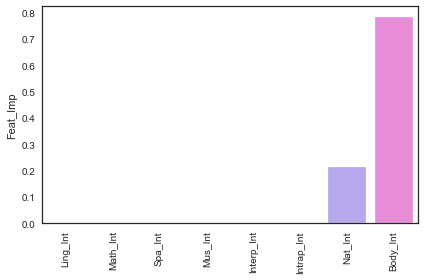

In [132]:
# dtr_model No Scale Data (The same with Scaled data)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2,
                              max_features="log2",
                              min_samples_leaf=2,
                              min_samples_split=2,
                              splitter="random",
                              random_state=42)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

### DTR & Visualize Tree

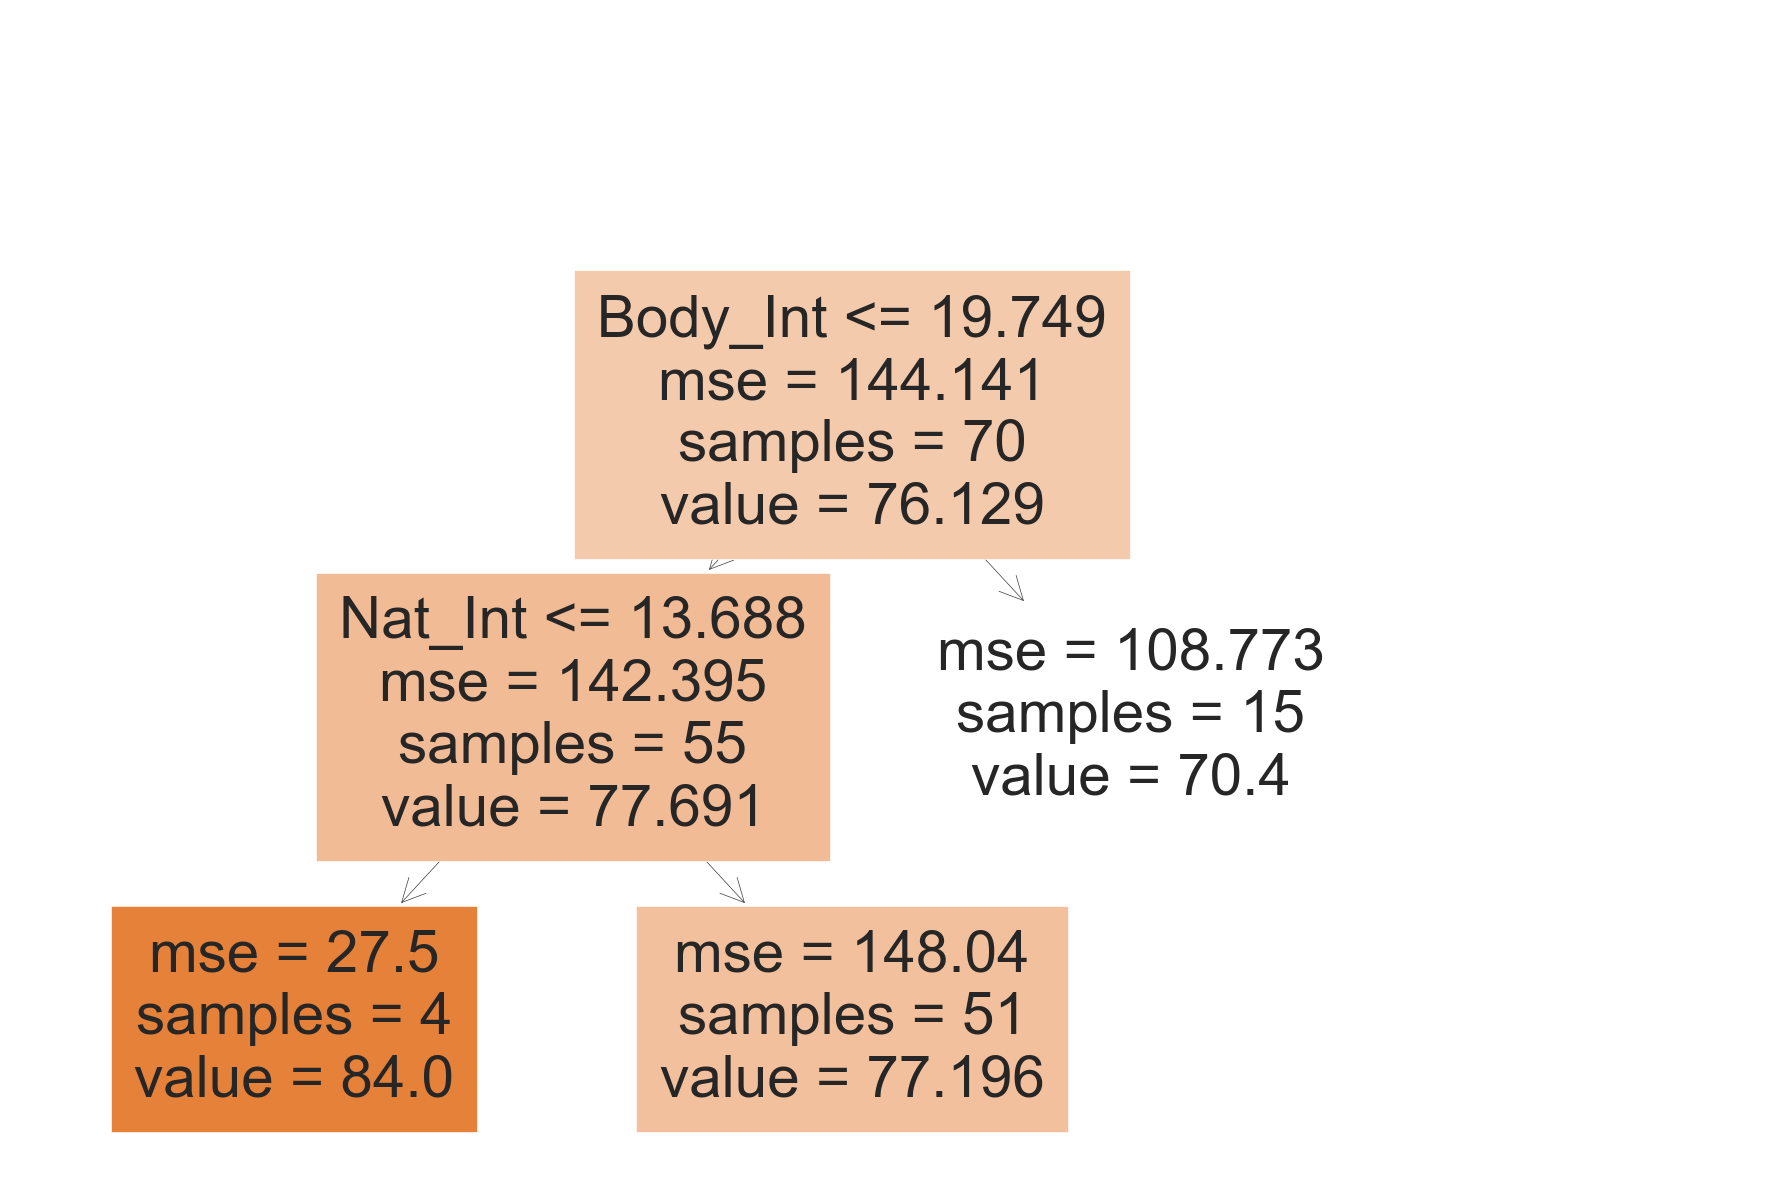

In [133]:
# dtr_model No Scale Data (The same with Scaled data)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

model = DecisionTreeRegressor(max_depth=2,
                              max_features="log2",
                              min_samples_leaf=2,
                              min_samples_split=2,
                              splitter="random",
                              random_state=42)
model.fit(X_reg_train, y_reg_train)
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,
          filled=True,
          feature_names=X_reg.columns)
plt.tight_layout();

## Random Forest

### RFR & Best Number of Trees

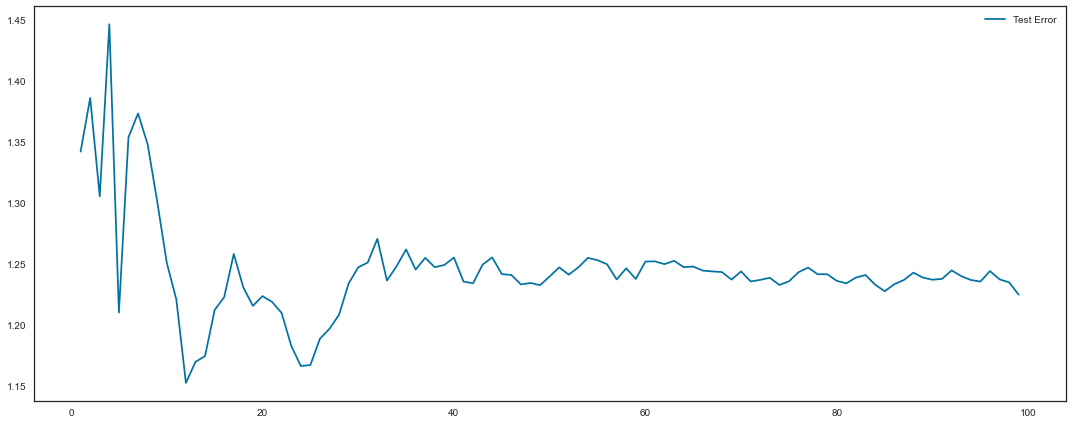

In [134]:
# rfr_model & No Scale Data (The same with the scaled data)
# Best Tree = 12
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

test_error = []
for n in range(1,100):
    model = RandomForestRegressor(n_estimators=n, max_features='auto', random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### RFR & GridSearchCV

In [135]:
# Best Params With NoScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [136]:
# rfr_mod for X_reg (Not scaled)

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = rfr_mod.predict(X_reg_test)
y_reg_train_prd = rfr_mod.predict(X_reg_train)

In [137]:
rfr_mod_scores = {"rfrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                               "R2" : r2_score(y_reg_train, y_reg_train_prd),
                               "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                               "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "rfrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                               "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                               "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                               "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

rfr_mod_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_scrs

,rfrm_trn,rfrm_tst
rmse,8.186163,12.527210
R2,0.535084,-0.151374
mae,6.757691,11.307691
mse,67.013270,156.931000


In [138]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [139]:
# rfr_model for MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = rfr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = rfr_mod.predict(X_reg_train_min_scl)

In [140]:
rfr_mod_scores = {"rfrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "rfrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

rfr_mod_min_scl_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_min_scl_scrs

,rfrm_mms_trn,rfrm_mms_tst
rmse,8.593992,12.502323
R2,0.487607,-0.146804
mae,7.081059,11.002713
mse,73.856699,156.308087


In [141]:
# Best Params With StandadScale Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[5, 12, 15, 20],
              "max_depth":[None, 3, 5],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 2, 3],
              "max_features":[None, "auto", "log2", 2, 3]}
model = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 15}

In [142]:
# rfr_model for StandadScale

from sklearn.ensemble import RandomForestRegressor
rfr_mod = RandomForestRegressor(max_depth=None,
                                max_features="log2",
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=15)
rfr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = rfr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = rfr_mod.predict(X_reg_train_std_scl)

In [143]:
rfr_mod_scores = {"rfrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                  "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                  "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "rfrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                  "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                  "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

rfr_mod_std_scl_scrs =pd.DataFrame(rfr_mod_scores)
rfr_mod_std_scl_scrs

,rfrm_ss_trn,rfrm_ss_tst
rmse,8.080311,12.602540
R2,0.547030,-0.165263
mae,6.425367,10.864142
mse,65.291426,158.824015


In [144]:
rfr_mod_scrs = pd.concat([rfr_mod_scrs, rfr_mod_min_scl_scrs, rfr_mod_std_scl_scrs], axis=1)
rfr_mod_scrs

,rfrm_trn,rfrm_tst,rfrm_mms_trn,rfrm_mms_tst,rfrm_ss_trn,rfrm_ss_tst
rmse,8.186163,12.527210,8.593992,12.502323,8.080311,12.602540
R2,0.535084,-0.151374,0.487607,-0.146804,0.547030,-0.165263
mae,6.757691,11.307691,7.081059,11.002713,6.425367,10.864142
mse,67.013270,156.931000,73.856699,156.308087,65.291426,158.824015


### RFR & CV

In [145]:
# rfr_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_cv = cross_validate(rfr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.846625
test_r2                              -0.721225
test_neg_mean_absolute_error        -11.042333
test_neg_mean_squared_error        -168.342947
dtype: float64

In [146]:
# rfr_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_mms_cv = cross_validate(rfr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.882771
test_r2                              -0.665605
test_neg_mean_absolute_error        -11.051401
test_neg_mean_squared_error        -172.433311
dtype: float64

In [147]:
# rfr_model & CV for StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
rfr_mod_cv = RandomForestRegressor(max_depth=None,
                                   max_features="log2",
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   n_estimators=15)
scores_ss_cv = cross_validate(rfr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.642276
test_r2                              -0.625854
test_neg_mean_absolute_error        -10.947229
test_neg_mean_squared_error        -164.307787
dtype: float64

In [148]:
rfr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
rfr_mod_cv_scrs.rename(columns={0:"rfr_cv_scr",
                                1:"rfr_cv_mms_scr",
                                2:"rfr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
rfr_mod_cv_scrs

,rfr_cv_scr,rfr_cv_mms_scr,rfr_cv_ss_scr
rmse,-12.846625,-12.882771,-12.642276
R2,-0.721225,-0.665605,-0.625854
mae,-11.042333,-11.051401,-10.947229
mse,-168.342947,-172.433311,-164.307787


In [149]:
rfr_mod_cum_scrs = pd.concat([rfr_mod_scrs, rfr_mod_cv_scrs], axis=1)
rfr_mod_cum_scrs.columns = ["rfrm_trn","rfrm_tst","rfr_cv_scr","rfrm_mms_trn","rfrm_mms_tst","rfr_cv_mms_scr","rfrm_ss_trn","rfrm_ss_tst","rfr_cv_ss_scr"]
rfr_mod_cum_scrs			

,rfrm_trn,rfrm_tst,rfr_cv_scr,rfrm_mms_trn,rfrm_mms_tst,rfr_cv_mms_scr,rfrm_ss_trn,rfrm_ss_tst,rfr_cv_ss_scr
rmse,8.186163,12.527210,8.593992,12.502323,8.080311,12.602540,-12.846625,-12.882771,-12.642276
R2,0.535084,-0.151374,0.487607,-0.146804,0.547030,-0.165263,-0.721225,-0.665605,-0.625854
mae,6.757691,11.307691,7.081059,11.002713,6.425367,10.864142,-11.042333,-11.051401,-10.947229
mse,67.013270,156.931000,73.856699,156.308087,65.291426,158.824015,-168.342947,-172.433311,-164.307787


### RFR & Feature Importance

,Feat_Imp
Ling_Int,0.069129
Intrap_Int,0.083492
Interp_Int,0.100071
Math_Int,0.120288
Mus_Int,0.122100
Spa_Int,0.145439
Nat_Int,0.149889
Body_Int,0.209592


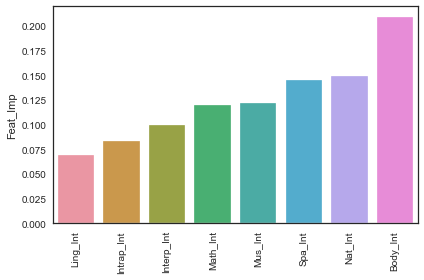

In [150]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=None,
                              max_features="log2",
                              min_samples_leaf=3,
                              min_samples_split=2,
                              n_estimators=15)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

### RFR & Visualize Tree

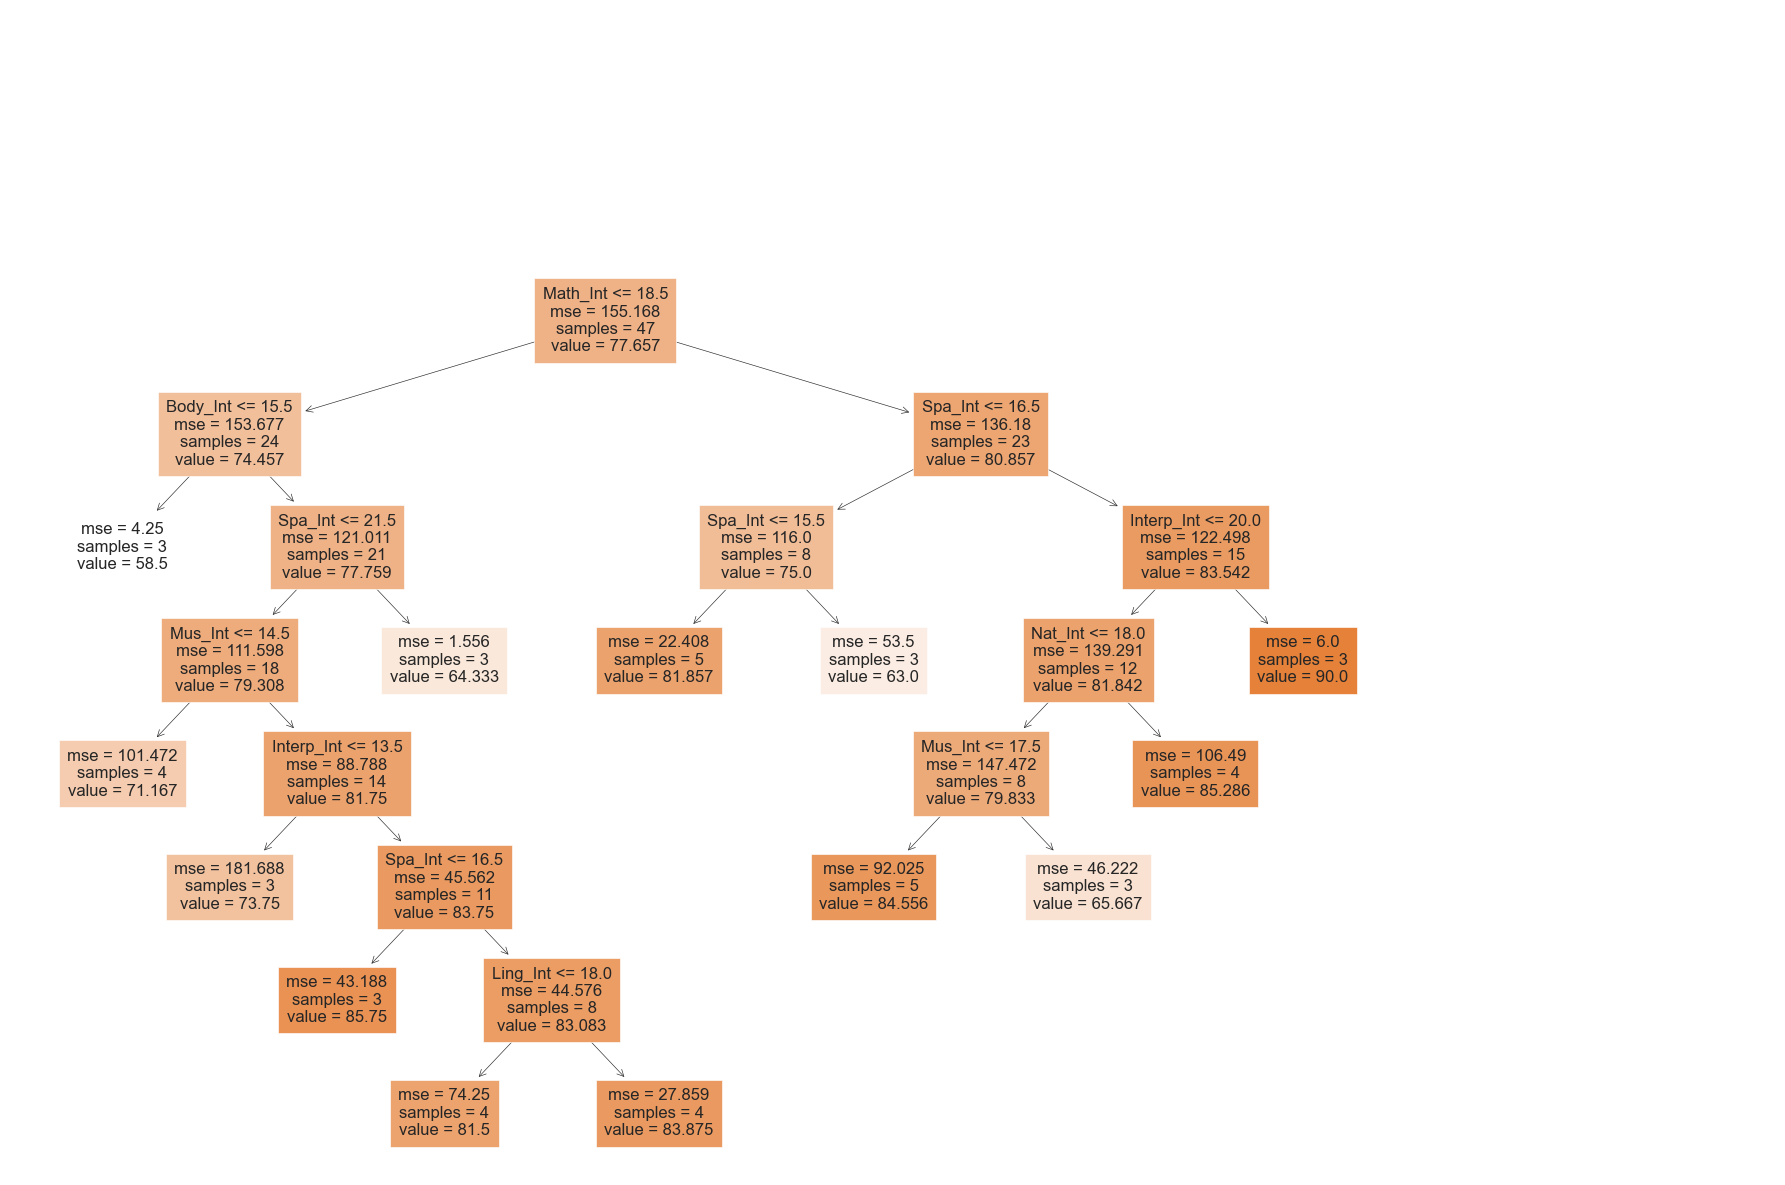

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
model = RandomForestRegressor(max_depth=None,
                              max_features="log2",
                              min_samples_leaf=3,
                              min_samples_split=2,
                              n_estimators=15)
model.fit(X_reg_train, y_reg_train)
plt.figure(figsize = (12,8), dpi = 150)
plot_tree(model.estimators_[0],
          filled = True,
          feature_names = X_reg.columns,
          fontsize = 8)
plt.tight_layout();

## AdaBoosting

### AdaBR & Best Number of "n_estimators"

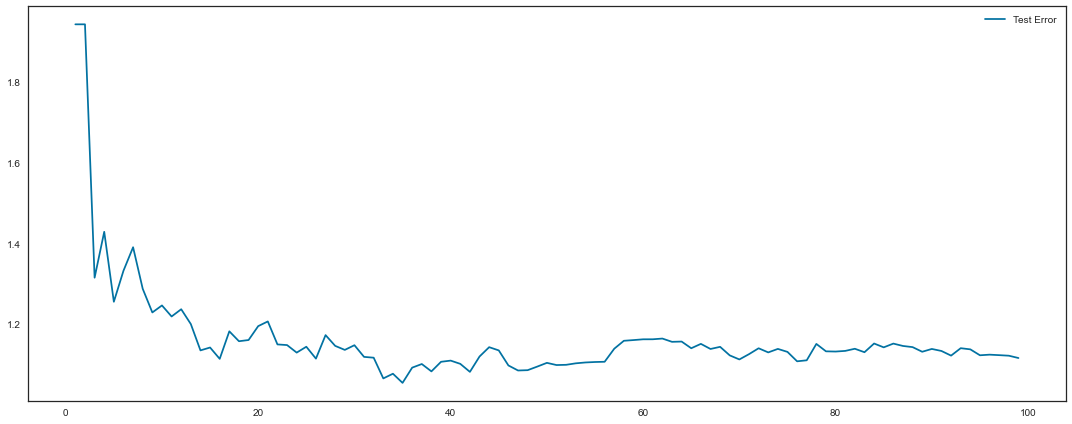

In [152]:
# Adar_model & No Scale Data 
# Best number of "n_estimators" = 18 (The same with the scaled data)
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
test_error = []

for n in range(1,100):
    model = AdaBoostRegressor(n_estimators=n, learning_rate=0.02, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### AdaBR & GridSearchCV

In [153]:
# Best Params With NoScale Data
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.02, 'n_estimators': 5}

In [154]:
# Adar_mod for X_reg (Not scaled)

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=5,
                             learning_rate=0.02)
Adar_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = Adar_mod.predict(X_reg_test)
y_reg_train_prd = Adar_mod.predict(X_reg_train)

In [155]:
Adar_mod_scores = {"Adarm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "Adarm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

Adar_mod_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_scrs

,Adarm_trn,Adarm_tst
rmse,9.918730,12.989696
R2,0.317464,-0.237957
mae,7.902435,11.327747
mse,98.381209,168.732192


In [156]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [157]:
# Adar_model for MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=20,
                             learning_rate=0.1)
Adar_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = Adar_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = Adar_mod.predict(X_reg_train_min_scl)

In [158]:
Adar_mod_scores = {"Adarm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "Adarm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

Adar_mod_min_scl_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_min_scl_scrs

,Adarm_mms_trn,Adarm_mms_tst
rmse,8.659084,12.296113
R2,0.479815,-0.109286
mae,7.134613,10.882422
mse,74.979739,151.194394


In [159]:
# Best Params With StandadScale Data

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[5, 10, 15, 18, 20, 50, 100],
              "learning_rate":[0.01, 0.02, 0.03, 0.1]}
model = AdaBoostRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.03, 'n_estimators': 5}

In [160]:
# Adar_model for StandadScale

from sklearn.ensemble import AdaBoostRegressor
Adar_mod = AdaBoostRegressor(n_estimators=5,
                             learning_rate=0.03)
Adar_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = Adar_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = Adar_mod.predict(X_reg_train_std_scl)

In [161]:
Adar_mod_scores = {"Adarm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "Adarm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

Adar_mod_std_scl_scrs =pd.DataFrame(Adar_mod_scores)
Adar_mod_std_scl_scrs

,Adarm_ss_trn,Adarm_ss_tst
rmse,9.537569,11.656297
R2,0.368913,0.003152
mae,7.377010,9.673491
mse,90.965227,135.869252


In [162]:
Adar_mod_scrs = pd.concat([Adar_mod_scrs, Adar_mod_min_scl_scrs, Adar_mod_std_scl_scrs], axis=1)
Adar_mod_scrs

,Adarm_trn,Adarm_tst,Adarm_mms_trn,Adarm_mms_tst,Adarm_ss_trn,Adarm_ss_tst
rmse,9.918730,12.989696,8.659084,12.296113,9.537569,11.656297
R2,0.317464,-0.237957,0.479815,-0.109286,0.368913,0.003152
mae,7.902435,11.327747,7.134613,10.882422,7.377010,9.673491
mse,98.381209,168.732192,74.979739,151.194394,90.965227,135.869252


### AdaBR & CV

In [163]:
# Adar_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=5,
                                learning_rate=0.02)
scores_cv = cross_validate(Adar_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -13.564853
test_r2                              -0.873327
test_neg_mean_absolute_error        -11.432411
test_neg_mean_squared_error        -187.502782
dtype: float64

In [164]:
# Adar_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=20,
                                learning_rate=0.1)
scores_mms_cv = cross_validate(Adar_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -13.123128
test_r2                              -0.636353
test_neg_mean_absolute_error        -11.169788
test_neg_mean_squared_error        -178.964139
dtype: float64

In [165]:
# Adar_model & CV for StandardScaler

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
Adar_mod_cv = AdaBoostRegressor(n_estimators=5,
                                learning_rate=0.03)
scores_ss_cv = cross_validate(Adar_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.927802
test_r2                              -0.629484
test_neg_mean_absolute_error        -10.460534
test_neg_mean_squared_error        -173.689393
dtype: float64

In [166]:
Adar_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
Adar_mod_cv_scrs.rename(columns={0:"Adar_cv_scr",
                                 1:"Adar_cv_mms_scr",
                                 2:"Adar_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
Adar_mod_cv_scrs

,Adar_cv_scr,Adar_cv_mms_scr,Adar_cv_ss_scr
rmse,-13.564853,-13.123128,-12.927802
R2,-0.873327,-0.636353,-0.629484
mae,-11.432411,-11.169788,-10.460534
mse,-187.502782,-178.964139,-173.689393


In [167]:
Adar_mod_cum_scrs = pd.concat([Adar_mod_scrs, Adar_mod_cv_scrs], axis=1)
Adar_mod_cum_scrs.columns = ["Adarm_trn","Adarm_tst","Adar_cv_scr","Adarm_mms_trn","Adarm_mms_tst","Adar_cv_mms_scr","Adarm_ss_trn","Adarm_ss_tst","Adar_cv_ss_scr"]
Adar_mod_cum_scrs			

,Adarm_trn,Adarm_tst,Adar_cv_scr,Adarm_mms_trn,Adarm_mms_tst,Adar_cv_mms_scr,Adarm_ss_trn,Adarm_ss_tst,Adar_cv_ss_scr
rmse,9.918730,12.989696,8.659084,12.296113,9.537569,11.656297,-13.564853,-13.123128,-12.927802
R2,0.317464,-0.237957,0.479815,-0.109286,0.368913,0.003152,-0.873327,-0.636353,-0.629484
mae,7.902435,11.327747,7.134613,10.882422,7.377010,9.673491,-11.432411,-11.169788,-10.460534
mse,98.381209,168.732192,74.979739,151.194394,90.965227,135.869252,-187.502782,-178.964139,-173.689393


### AdaBR & Feature Importance

,Feat_Imp
Interp_Int,0.002878
Mus_Int,0.012524
Spa_Int,0.052249
Intrap_Int,0.053729
Ling_Int,0.127291
Math_Int,0.150761
Body_Int,0.220110
Nat_Int,0.380458


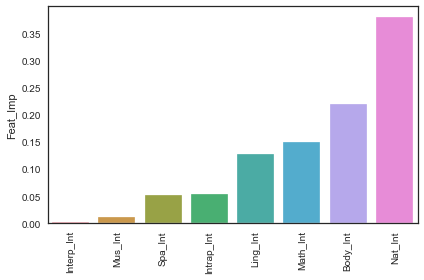

In [168]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=5, learning_rate=0.02, random_state=42)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## GradientBoosting

### GrdBR & Best Number of "n_estimators"

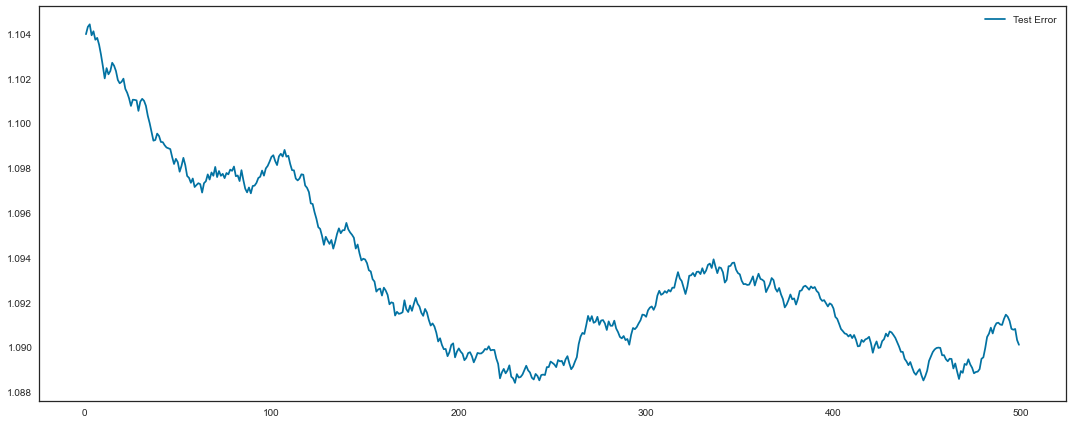

In [169]:
# Grdr_model & No Scale Data 
# Best number of "n_estimators" = 200 (The same with the scaled data)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
test_error = []

for n in range(1,500):
    model = GradientBoostingRegressor(n_estimators=n,
                                      max_depth=3,
                                      max_features=None,
                                      subsample=0.8,
                                      learning_rate=0.001,
                                      random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,500), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### GrdBR & GridSearchCV

In [170]:
# Best Params With NoScale Data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [171]:
# Grdr_mod for X_reg (Not scaled)

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = Grdr_mod.predict(X_reg_test)
y_reg_train_prd = Grdr_mod.predict(X_reg_train)

In [172]:
Grdr_mod_scores = {"Grdrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "Grdrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

Grdr_mod_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_scrs

,Grdrm_trn,Grdrm_tst
rmse,11.316055,12.177450
R2,0.111610,-0.087979
mae,9.735406,10.845544
mse,128.053105,148.290299


In [173]:
# Best Params With MinMaxScale Data

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [174]:
# Grdr_model for MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = Grdr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = Grdr_mod.predict(X_reg_train_min_scl)

In [175]:
Grdr_mod_scores = {"Grdrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "Grdrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

Grdr_mod_min_scl_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_min_scl_scrs

,Grdrm_mms_trn,Grdrm_mms_tst
rmse,11.311851,12.182620
R2,0.112270,-0.088903
mae,9.726256,10.848126
mse,127.957979,148.416231


In [176]:
# Best Params With StandadScale Data

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = GradientBoostingRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [177]:
# Grdr_model for StandadScale

from sklearn.ensemble import GradientBoostingRegressor
Grdr_mod = GradientBoostingRegressor(learning_rate=0.001,
                                     max_depth=3,
                                     max_features=None,
                                     n_estimators=200,
                                     subsample=0.8)
Grdr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = Grdr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = Grdr_mod.predict(X_reg_train_std_scl)

In [178]:
Grdr_mod_scores = {"Grdrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "Grdrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

Grdr_mod_std_scl_scrs =pd.DataFrame(Grdr_mod_scores)
Grdr_mod_std_scl_scrs

,Grdrm_ss_trn,Grdrm_ss_tst
rmse,11.328273,12.196407
R2,0.109690,-0.091369
mae,9.746659,10.875858
mse,128.329763,148.752351


In [179]:
Grdr_mod_scrs = pd.concat([Grdr_mod_scrs, Grdr_mod_min_scl_scrs, Grdr_mod_std_scl_scrs], axis=1)
Grdr_mod_scrs

,Grdrm_trn,Grdrm_tst,Grdrm_mms_trn,Grdrm_mms_tst,Grdrm_ss_trn,Grdrm_ss_tst
rmse,11.316055,12.177450,11.311851,12.182620,11.328273,12.196407
R2,0.111610,-0.087979,0.112270,-0.088903,0.109690,-0.091369
mae,9.735406,10.845544,9.726256,10.848126,9.746659,10.875858
mse,128.053105,148.290299,127.957979,148.416231,128.329763,148.752351


### GrdBR & CV

In [180]:
# Grdr_mod & CV for X_reg (Not scaled)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_cv = cross_validate(Grdr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.171914
test_r2                              -0.509509
test_neg_mean_absolute_error        -10.596706
test_neg_mean_squared_error        -150.742532
dtype: float64

In [181]:
# Grdr_mod & CV for X_reg MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_mms_cv = cross_validate(Grdr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.161390
test_r2                              -0.507573
test_neg_mean_absolute_error        -10.589022
test_neg_mean_squared_error        -150.477850
dtype: float64

In [182]:
# Grdr_model & CV for StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
Grdr_mod_cv = GradientBoostingRegressor(learning_rate=0.001,
                                        max_depth=3,
                                        max_features=None,
                                        n_estimators=200,
                                        subsample=0.8)
scores_ss_cv = cross_validate(Grdr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.183074
test_r2                              -0.510805
test_neg_mean_absolute_error        -10.599364
test_neg_mean_squared_error        -150.910019
dtype: float64

In [183]:
Grdr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
Grdr_mod_cv_scrs.rename(columns={0:"Grdr_cv_scr",
                                 1:"Grdr_cv_mms_scr",
                                 2:"Grdr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
Grdr_mod_cv_scrs

,Grdr_cv_scr,Grdr_cv_mms_scr,Grdr_cv_ss_scr
rmse,-12.171914,-12.161390,-12.183074
R2,-0.509509,-0.507573,-0.510805
mae,-10.596706,-10.589022,-10.599364
mse,-150.742532,-150.477850,-150.910019


In [184]:
Grdr_mod_cum_scrs = pd.concat([Grdr_mod_scrs, Grdr_mod_cv_scrs], axis=1)
Grdr_mod_cum_scrs.columns = ["Grdrm_trn","Grdrm_tst","Grdr_cv_scr","Grdrm_mms_trn","Grdrm_mms_tst","Grdr_cv_mms_scr","Grdrm_ss_trn","Grdrm_ss_tst","Grdr_cv_ss_scr"]
Grdr_mod_cum_scrs			

,Grdrm_trn,Grdrm_tst,Grdr_cv_scr,Grdrm_mms_trn,Grdrm_mms_tst,Grdr_cv_mms_scr,Grdrm_ss_trn,Grdrm_ss_tst,Grdr_cv_ss_scr
rmse,11.316055,12.177450,11.311851,12.182620,11.328273,12.196407,-12.171914,-12.161390,-12.183074
R2,0.111610,-0.087979,0.112270,-0.088903,0.109690,-0.091369,-0.509509,-0.507573,-0.510805
mae,9.735406,10.845544,9.726256,10.848126,9.746659,10.875858,-10.596706,-10.589022,-10.599364
mse,128.053105,148.290299,127.957979,148.416231,128.329763,148.752351,-150.742532,-150.477850,-150.910019


### GrdBR & Feature Importance

,Feat_Imp
Mus_Int,0.048531
Ling_Int,0.061964
Intrap_Int,0.080798
Interp_Int,0.085438
Spa_Int,0.131079
Body_Int,0.178057
Nat_Int,0.187723
Math_Int,0.226410


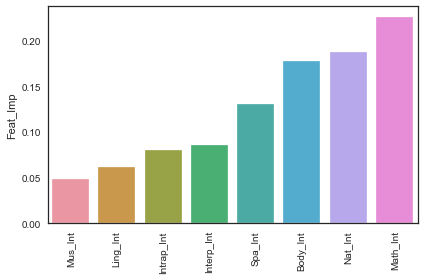

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(learning_rate=0.001,
                                  max_depth=3,
                                  max_features=None,
                                  n_estimators=200,
                                  subsample=0.8)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## XGB

### XGBR & Best Number of "n_estimators"

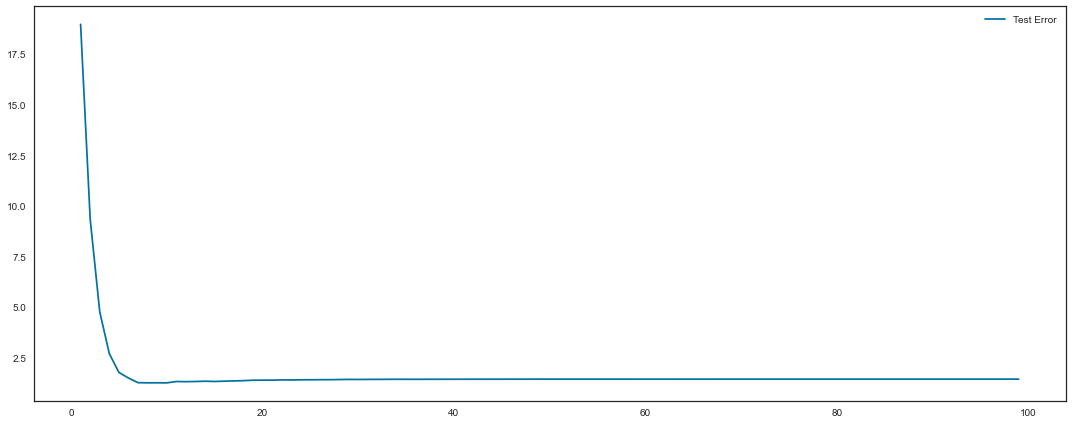

In [186]:
# xgbr_model & No Scale Data 
# Best number of "n_estimators" = 10 (The same with the scaled data)
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
test_error = []

for n in range(1,100):
    model = XGBRegressor(n_estimators=n, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### XGBR & GridSearchCV

In [187]:
# Best Params With NoScale Data
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [188]:
# xgbr_mod for X_reg (Not scaled)

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = xgbr_mod.predict(X_reg_test)
y_reg_train_prd = xgbr_mod.predict(X_reg_train)

In [189]:
xgbr_mod_scores = {"xgbrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                 "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                 "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                 "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                  "xgbrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

xgbr_mod_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_scrs

,xgbrm_trn,xgbrm_tst
rmse,9.102535,11.982605
R2,0.425171,-0.053441
mae,7.100905,10.301390
mse,82.856141,143.582819


In [190]:
# Best Params With MinMaxScale Data

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [191]:
# xgbr_model for MinMaxScaler

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = xgbr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = xgbr_mod.predict(X_reg_train_min_scl)

In [192]:
xgbr_mod_scores = {"xgbrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                  "xgbrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                    "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                    "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

xgbr_mod_min_scl_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_min_scl_scrs

,xgbrm_mms_trn,xgbrm_mms_tst
rmse,9.102535,11.982605
R2,0.425171,-0.053441
mae,7.100905,10.301390
mse,82.856141,143.582819


In [193]:
# Best Params With StandadScale Data

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[20, 30, 40],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3],
              "learning_rate": [0.01, 0.1, 0.5],
              "max_depth":[2,3],
              "colsample_bytree":[0.5, 1]}
model = XGBRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 30,
 'subsample': 1}

In [194]:
# xgbr_model for StandadScale

from xgboost import XGBRegressor
xgbr_mod = XGBRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=3,
                        max_features=None,
                        n_estimators=30,
                        subsample=1)
xgbr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = xgbr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = xgbr_mod.predict(X_reg_train_std_scl)

In [195]:
xgbr_mod_scores = {"xgbrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                    "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                    "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                    "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                  "xgbrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

xgbr_mod_std_scl_scrs =pd.DataFrame(xgbr_mod_scores)
xgbr_mod_std_scl_scrs

,xgbrm_ss_trn,xgbrm_ss_tst
rmse,9.102535,11.980123
R2,0.425171,-0.053005
mae,7.100905,10.297643
mse,82.856141,143.523355


In [196]:
xgbr_mod_scrs = pd.concat([xgbr_mod_scrs, xgbr_mod_min_scl_scrs, xgbr_mod_std_scl_scrs], axis=1)
xgbr_mod_scrs

,xgbrm_trn,xgbrm_tst,xgbrm_mms_trn,xgbrm_mms_tst,xgbrm_ss_trn,xgbrm_ss_tst
rmse,9.102535,11.982605,9.102535,11.982605,9.102535,11.980123
R2,0.425171,-0.053441,0.425171,-0.053441,0.425171,-0.053005
mae,7.100905,10.301390,7.100905,10.301390,7.100905,10.297643
mse,82.856141,143.582819,82.856141,143.582819,82.856141,143.523355


### XGBBR & CV

In [197]:
# xgbr_mod & CV for X_reg (Not scaled)

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_cv = cross_validate(xgbr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.709483
test_r2                              -0.517648
test_neg_mean_absolute_error        -10.498595
test_neg_mean_squared_error        -168.264356
dtype: float64

In [198]:
# xgbr_mod & CV for X_reg MinMaxScaler

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_mms_cv = cross_validate(xgbr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.709483
test_r2                              -0.517648
test_neg_mean_absolute_error        -10.498595
test_neg_mean_squared_error        -168.264356
dtype: float64

In [199]:
# xgbr_model & CV for StandardScaler

from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
xgbr_mod_cv = XGBRegressor(colsample_bytree=0.5,
                           learning_rate=0.1,
                           max_depth=3,
                           max_features=None,
                           n_estimators=30,
                           subsample=1)
scores_ss_cv = cross_validate(xgbr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.692402
test_r2                              -0.513864
test_neg_mean_absolute_error        -10.466307
test_neg_mean_squared_error        -167.804989
dtype: float64

In [200]:
xgbr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
xgbr_mod_cv_scrs.rename(columns={0:"xgbr_cv_scr",
                                 1:"xgbr_cv_mms_scr",
                                 2:"xgbr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
xgbr_mod_cv_scrs

,xgbr_cv_scr,xgbr_cv_mms_scr,xgbr_cv_ss_scr
rmse,-12.709483,-12.709483,-12.692402
R2,-0.517648,-0.517648,-0.513864
mae,-10.498595,-10.498595,-10.466307
mse,-168.264356,-168.264356,-167.804989


In [201]:
xgbr_mod_cum_scrs = pd.concat([xgbr_mod_scrs, xgbr_mod_cv_scrs], axis=1)
xgbr_mod_cum_scrs.columns = ["xgbrm_trn","xgbrm_tst","xgbr_cv_scr","xgbrm_mms_trn","xgbrm_mms_tst","xgbr_cv_mms_scr","xgbrm_ss_trn","xgbrm_ss_tst","xgbr_cv_ss_scr"]
xgbr_mod_cum_scrs			

,xgbrm_trn,xgbrm_tst,xgbr_cv_scr,xgbrm_mms_trn,xgbrm_mms_tst,xgbr_cv_mms_scr,xgbrm_ss_trn,xgbrm_ss_tst,xgbr_cv_ss_scr
rmse,9.102535,11.982605,9.102535,11.982605,9.102535,11.980123,-12.709483,-12.709483,-12.692402
R2,0.425171,-0.053441,0.425171,-0.053441,0.425171,-0.053005,-0.517648,-0.517648,-0.513864
mae,7.100905,10.301390,7.100905,10.301390,7.100905,10.297643,-10.498595,-10.498595,-10.466307
mse,82.856141,143.582819,82.856141,143.582819,82.856141,143.523355,-168.264356,-168.264356,-167.804989


### XGBBR & Feature Importance

,Feat_Imp
Ling_Int,0.053685
Body_Int,0.088347
Mus_Int,0.091521
Intrap_Int,0.104458
Spa_Int,0.114694
Math_Int,0.151300
Interp_Int,0.183081
Nat_Int,0.212914


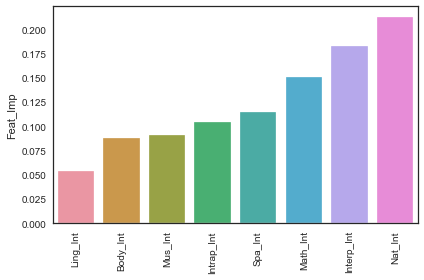

In [202]:
from xgboost import XGBRegressor

model = XGBRegressor(colsample_bytree=0.5,
                     learning_rate=0.1,
                     max_depth=3,
                     max_features=None,
                     n_estimators=30,
                     subsample=1)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")

sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## LGBM

### LGBMR & Best Number of "n_estimators"

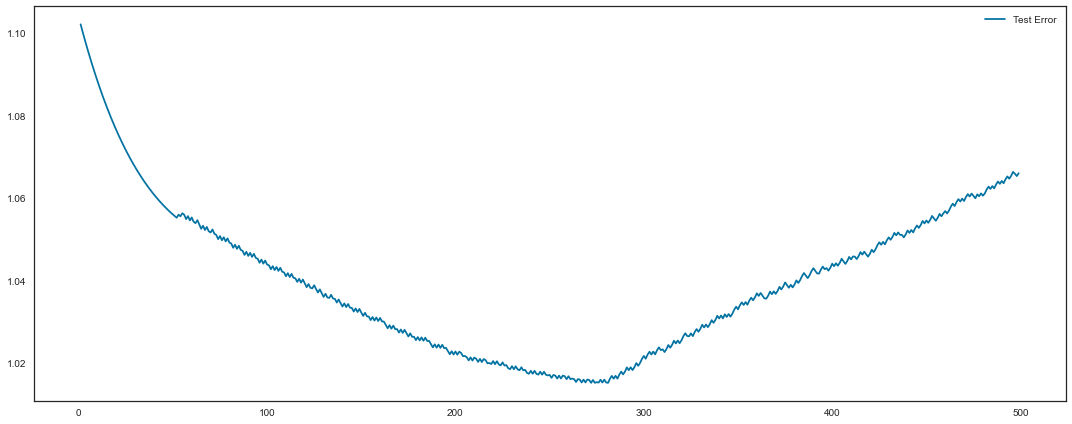

In [203]:
# lgbmr_model & No Scale Data 
# Best number of "n_estimators" = 200 (The same with the scaled data)
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
test_error = []

for n in range(1,500):
    model = LGBMRegressor(n_estimators=n,
                          max_depth=2,
                          max_features=None,
                          subsample=0.8,
                          learning_rate=0.01,
                          random_state=42)
    model.fit(X_reg_train, y_reg_train)
    y_test_pred = model.predict(X_reg_test)
    test_error.append(1-r2_score(y_reg_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,500), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### LGBMR & GridSearchCV

In [204]:
# Best Params With NoScale Data
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [205]:
# lgbmr_mod for X_reg (Not scaled)

from lightgbm import LGBMRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train, y_reg_train)
y_reg_test_prd = lgbmr_mod.predict(X_reg_test)
y_reg_train_prd = lgbmr_mod.predict(X_reg_train)

In [206]:
lgbmr_mod_scores = {"lgbmrm_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_prd)),
                                   "R2" : r2_score(y_reg_train, y_reg_train_prd),
                                   "mae" : mean_absolute_error(y_reg_train, y_reg_train_prd),
                                   "mse" : mean_squared_error(y_reg_train, y_reg_train_prd)}, 

                    "lgbmrm_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_prd)),
                                   "mae" : mean_absolute_error(y_reg_test, y_reg_test_prd),
                                   "mse" : mean_squared_error(y_reg_test, y_reg_test_prd),
                                   "R2" : r2_score(y_reg_test, y_reg_test_prd)}}

lgbmr_mod_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_scrs

,lgbmrm_trn,lgbmrm_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [207]:
# Best Params With MinMaxScale Data

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_min_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [208]:
# lgbmr_model for MinMaxScaler

from sklearn.ensemble import GradientBoostingRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train_min_scl, y_reg_train)
y_reg_test_min_scl_prd = lgbmr_mod.predict(X_reg_test_min_scl)
y_reg_train_min_scl_prd = lgbmr_mod.predict(X_reg_train_min_scl)

In [209]:
lgbmr_mod_scores = {"lgbmrm_mms_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)),
                                     "R2" : r2_score(y_reg_train, y_reg_train_min_scl_prd),
                                     "mae" : mean_absolute_error(y_reg_train, y_reg_train_min_scl_prd),
                                     "mse" : mean_squared_error(y_reg_train, y_reg_train_min_scl_prd)}, 

                    "lgbmrm_mms_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_min_scl_prd)),
                                      "mae" : mean_absolute_error(y_reg_test, y_reg_test_min_scl_prd),
                                      "mse" : mean_squared_error(y_reg_test, y_reg_test_min_scl_prd),
                                      "R2" : r2_score(y_reg_test, y_reg_test_min_scl_prd)}}

lgbmr_mod_min_scl_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_min_scl_scrs

,lgbmrm_mms_trn,lgbmrm_mms_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [210]:
# Best Params With StandadScale Data

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}
model = LGBMRegressor(random_state=42)
model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)
model_grid.fit(X_reg_train_std_scl, y_reg_train)
model_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 300,
 'subsample': 0.8}

In [211]:
# lgbmr_model for StandadScale

from lightgbm import LGBMRegressor
lgbmr_mod = LGBMRegressor(learning_rate=0.001,
                          max_depth=2,
                          max_features=None,
                          n_estimators=300,
                          subsample=0.8)
lgbmr_mod.fit(X_reg_train_std_scl, y_reg_train)
y_reg_test_std_scl_prd = lgbmr_mod.predict(X_reg_test_std_scl)
y_reg_train_std_scl_prd = lgbmr_mod.predict(X_reg_train_std_scl)

In [212]:
lgbmr_mod_scores = {"lgbmrm_ss_trn": {"rmse" : np.sqrt(mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)),
                                      "R2" : r2_score(y_reg_train, y_reg_train_std_scl_prd),
                                      "mae" : mean_absolute_error(y_reg_train, y_reg_train_std_scl_prd),
                                      "mse" : mean_squared_error(y_reg_train, y_reg_train_std_scl_prd)}, 

                    "lgbmrm_ss_tst": {"rmse" : np.sqrt(mean_squared_error(y_reg_test, y_reg_test_std_scl_prd)),
                                      "mae" : mean_absolute_error(y_reg_test, y_reg_test_std_scl_prd),
                                      "mse" : mean_squared_error(y_reg_test, y_reg_test_std_scl_prd),
                                      "R2" : r2_score(y_reg_test, y_reg_test_std_scl_prd)}}

lgbmr_mod_std_scl_scrs =pd.DataFrame(lgbmr_mod_scores)
lgbmr_mod_std_scl_scrs

,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.696354,12.062363
R2,0.050894,-0.067511
mae,10.070134,10.642544
mse,136.804689,145.500592


In [213]:
lgbmr_mod_scrs = pd.concat([lgbmr_mod_scrs, lgbmr_mod_min_scl_scrs, lgbmr_mod_std_scl_scrs], axis=1)
lgbmr_mod_scrs

,lgbmrm_trn,lgbmrm_tst,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363
R2,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511
mae,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544
mse,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592


### LGBMR & CV

In [214]:
# lgbmr_mod & CV for X_reg (Not scaled)

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                            max_depth=2,
                            max_features=None,
                            n_estimators=300,
                            subsample=0.8)
scores_cv = cross_validate(lgbmr_mod_cv,
                           X_reg_train,
                           y_reg_train,
                           scoring = ["neg_root_mean_squared_error",
                                      "r2",
                                      "neg_mean_absolute_error",
                                      "neg_mean_squared_error"],
                           cv = 10)
scores_cv = (pd.DataFrame(scores_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [215]:
# lgbmr_mod & CV for X_reg MinMaxScaler

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                             max_depth=2,
                             max_features=None,
                             n_estimators=300,
                             subsample=0.8)
scores_mms_cv = cross_validate(lgbmr_mod_cv,
                               X_reg_train_min_scl,
                               y_reg_train,
                               scoring = ["neg_root_mean_squared_error",
                                          "r2",
                                          "neg_mean_absolute_error",
                                          "neg_mean_squared_error"],
                               cv = 10)
scores_mms_cv = (pd.DataFrame(scores_mms_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_mms_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [216]:
# lgbmr_model & CV for StandardScaler

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
lgbmr_mod_cv = LGBMRegressor(learning_rate=0.001,
                             max_depth=2,
                             max_features=None,
                             n_estimators=300,
                             subsample=0.8)
scores_ss_cv = cross_validate(lgbmr_mod_cv,
                              X_reg_train_std_scl,
                              y_reg_train,
                              scoring = ["neg_root_mean_squared_error",
                                         "r2",
                                         "neg_mean_absolute_error",
                                         "neg_mean_squared_error"],
                              cv = 10)
scores_ss_cv = (pd.DataFrame(scores_ss_cv, index=range(1,11))).iloc[:, 2:].mean()
scores_ss_cv

test_neg_root_mean_squared_error    -12.196217
test_r2                              -0.518380
test_neg_mean_absolute_error        -10.677705
test_neg_mean_squared_error        -151.394415
dtype: float64

In [217]:
lgbmr_mod_cv_scrs = pd.concat([scores_cv, scores_mms_cv, scores_ss_cv], axis=1)
lgbmr_mod_cv_scrs.rename(columns={0:"lgbmr_cv_scr",
                                  1:"lgbmr_cv_mms_scr",
                                  2:"lgbmr_cv_ss_scr"},
                       index={"test_neg_root_mean_squared_error":"rmse",
                              "test_r2":"R2",
                              "test_neg_mean_absolute_error":"mae",
                              "test_neg_mean_squared_error":"mse"},
                       inplace=True)
lgbmr_mod_cv_scrs

,lgbmr_cv_scr,lgbmr_cv_mms_scr,lgbmr_cv_ss_scr
rmse,-12.196217,-12.196217,-12.196217
R2,-0.518380,-0.518380,-0.518380
mae,-10.677705,-10.677705,-10.677705
mse,-151.394415,-151.394415,-151.394415


In [218]:
lgbmr_mod_cum_scrs = pd.concat([lgbmr_mod_scrs, lgbmr_mod_cv_scrs], axis=1)
lgbmr_mod_cum_scrs.columns = ["lgbmrm_trn","lgbmrm_tst","lgbmr_cv_scr","lgbmrm_mms_trn","lgbmrm_mms_tst","lgbmr_cv_mms_scr","lgbmrm_ss_trn","lgbmrm_ss_tst","lgbmr_cv_ss_scr"]
lgbmr_mod_cum_scrs			

,lgbmrm_trn,lgbmrm_tst,lgbmr_cv_scr,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmr_cv_mms_scr,lgbmrm_ss_trn,lgbmrm_ss_tst,lgbmr_cv_ss_scr
rmse,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363,-12.196217,-12.196217,-12.196217
R2,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511,-0.518380,-0.518380,-0.518380
mae,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544,-10.677705,-10.677705,-10.677705
mse,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592,-151.394415,-151.394415,-151.394415


### LGBMR & Feature Importance

,Feat_Imp
Ling_Int,0
Math_Int,0
Spa_Int,0
Mus_Int,0
Body_Int,0
Interp_Int,0
Intrap_Int,0
Nat_Int,600


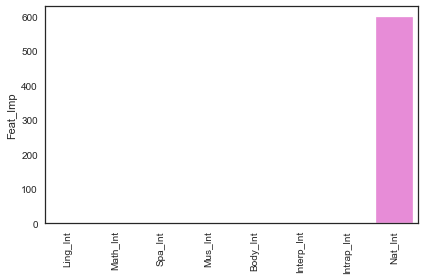

In [219]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(learning_rate=0.001,
                      max_depth=2,
                      max_features=None,
                      n_estimators=300,
                      subsample=0.8)
model.fit(X_reg_train, y_reg_train)
Feat_Imp = pd.DataFrame(index = X_reg.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()
Feat_Imp

## ALL

### All

In [230]:
all_scrs = pd.concat([lin_mod_scrs,
                      rid_mod_scrs,
                      las_mod_scrs,
                      els_mod_scrs,
                      knnr_mod_scrs,
                      svr_mod_scrs,
                      dtr_mod_scrs,
                      rfr_mod_scrs,
                      Adar_mod_scrs,
                      Grdr_mod_scrs,
                      xgbr_mod_scrs,
                      lgbmr_mod_scrs],
                      axis=1)
#lgbmr_mod_cum_scrs.columns = ["lgbmrm_trn","lgbmrm_tst","lgbmr_cv_scr","lgbmrm_mms_trn","lgbmrm_mms_tst","lgbmr_cv_mms_scr","lgbmrm_ss_trn","lgbmrm_ss_tst","lgbmr_cv_ss_scr"]
all_scrs

,lm_trn,lm_tst,lm_mms_trn,lm_mms_tst,lm_ss_trn,lm_ss_tst,rm_trn,rm_tst,rm_mms_trn,rm_mms_tst,...,xgbrm_mms_trn,xgbrm_mms_tst,xgbrm_ss_trn,xgbrm_ss_tst,lgbmrm_trn,lgbmrm_tst,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221,11.866706,12.442072,11.876752,12.323480,...,9.102535,11.982605,9.102535,11.980123,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135777,0.021391,-0.114229,...,0.425171,-0.053441,0.425171,-0.053005,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958,10.111488,11.230004,10.184354,11.119722,...,7.100905,10.301390,7.100905,10.297643,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760,140.818708,154.805150,141.057235,151.868147,...,82.856141,143.582819,82.856141,143.523355,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592


In [231]:
all_scrs = all_scrs.T
all_scrs	

,rmse,R2,mae,mse
lm_trn,11.866705,0.023046,10.110832,140.818691
lm_tst,12.443221,-0.135987,11.230958,154.833760
lm_mms_trn,11.866705,0.023046,10.110832,140.818691
lm_mms_tst,12.443221,-0.135987,11.230958,154.833760
lm_ss_trn,11.866705,0.023046,10.110832,140.818691
...,...,...,...,...
lgbmrm_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_mms_trn,11.696354,0.050894,10.070134,136.804689
lgbmrm_mms_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_ss_trn,11.696354,0.050894,10.070134,136.804689


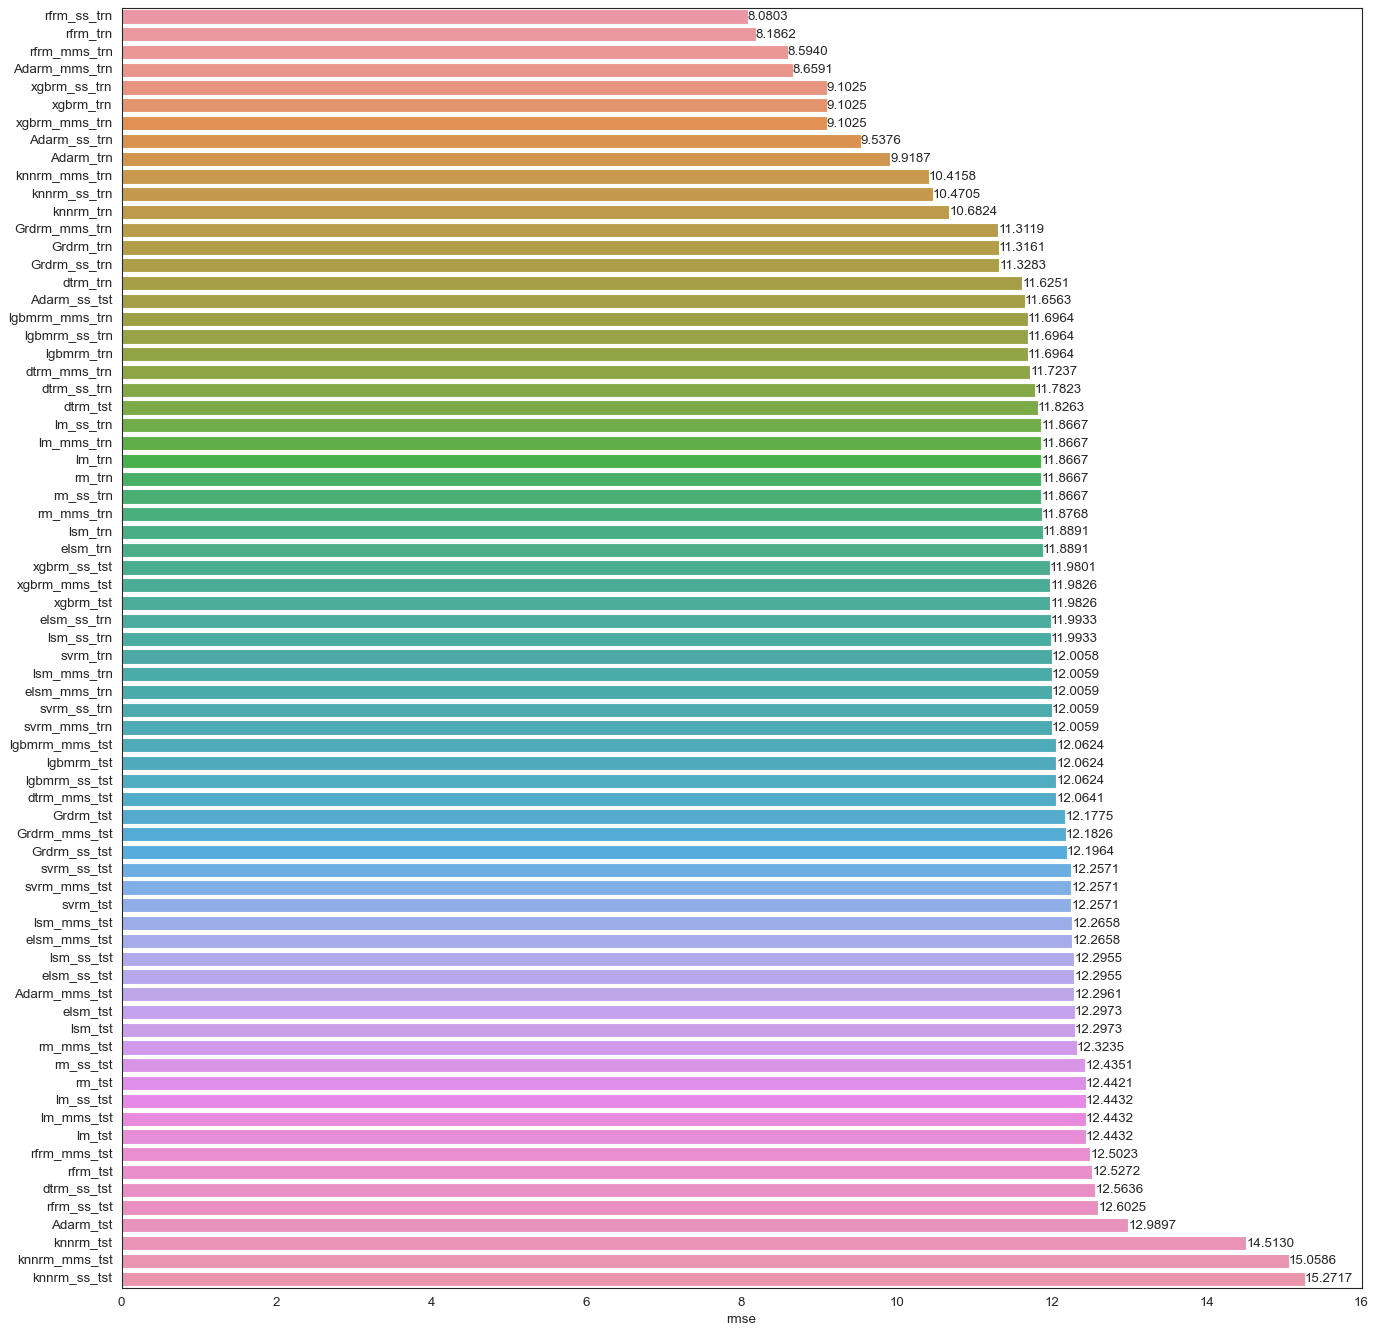

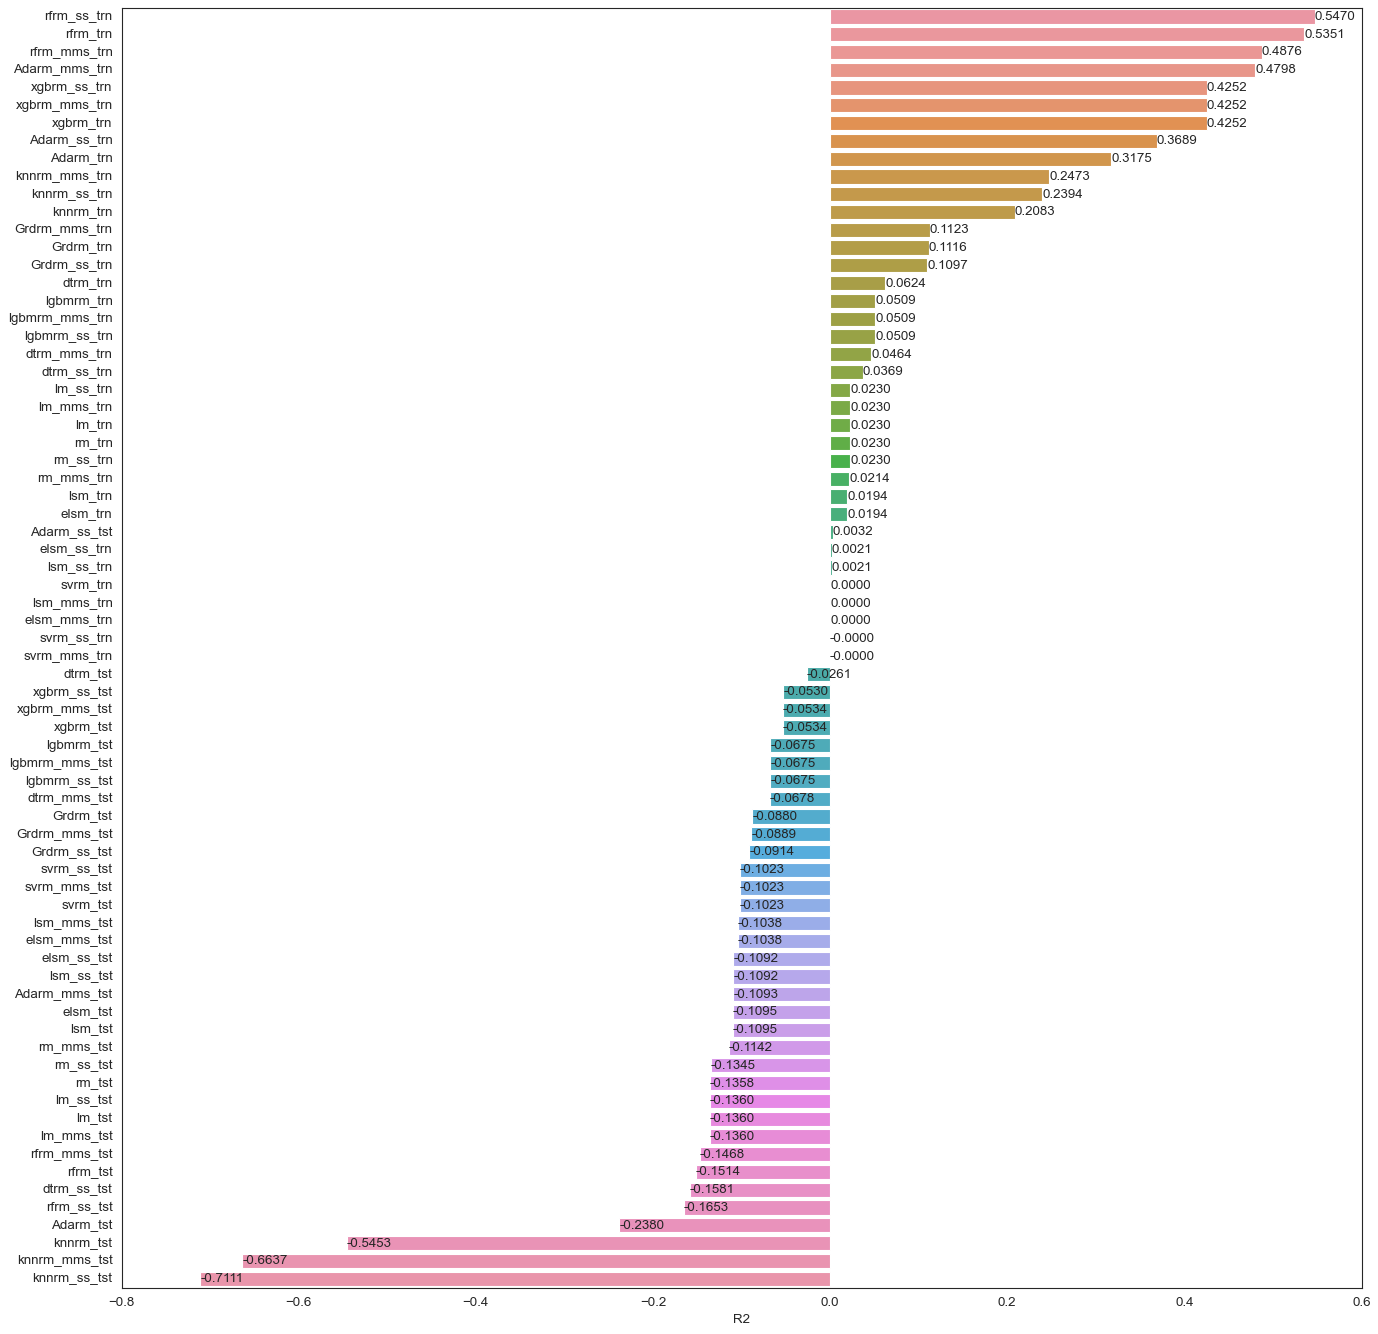

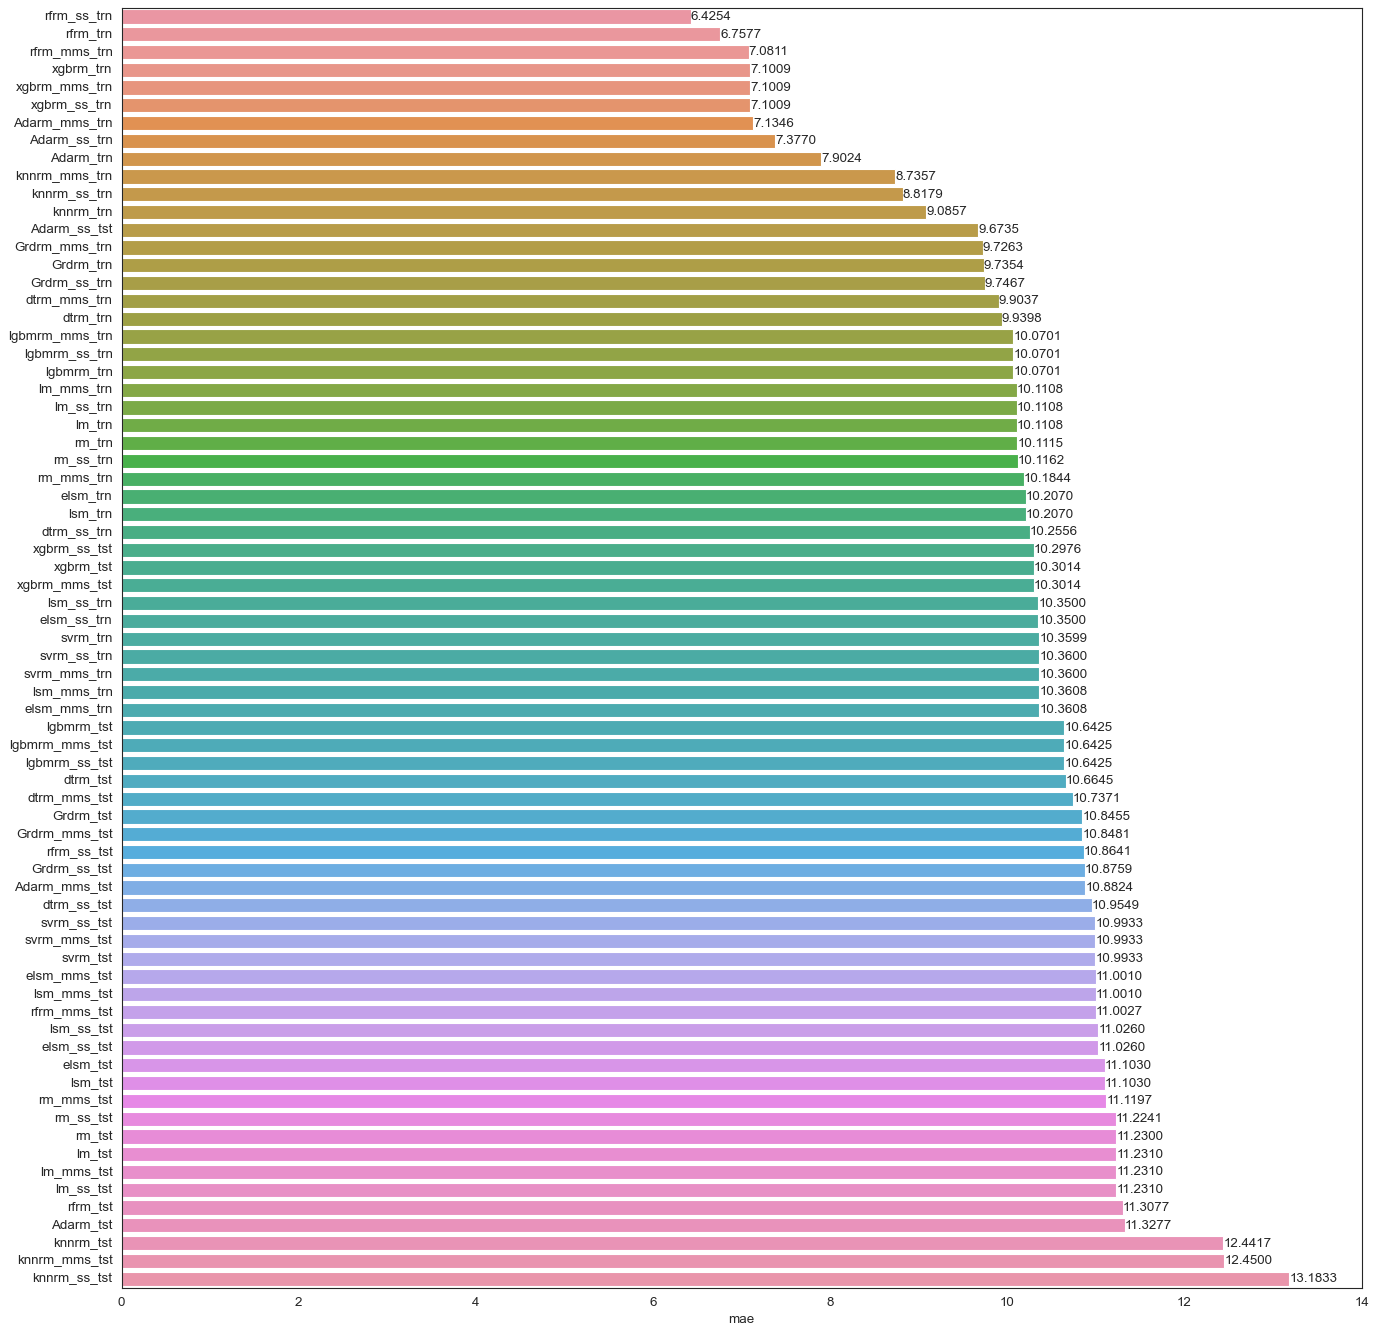

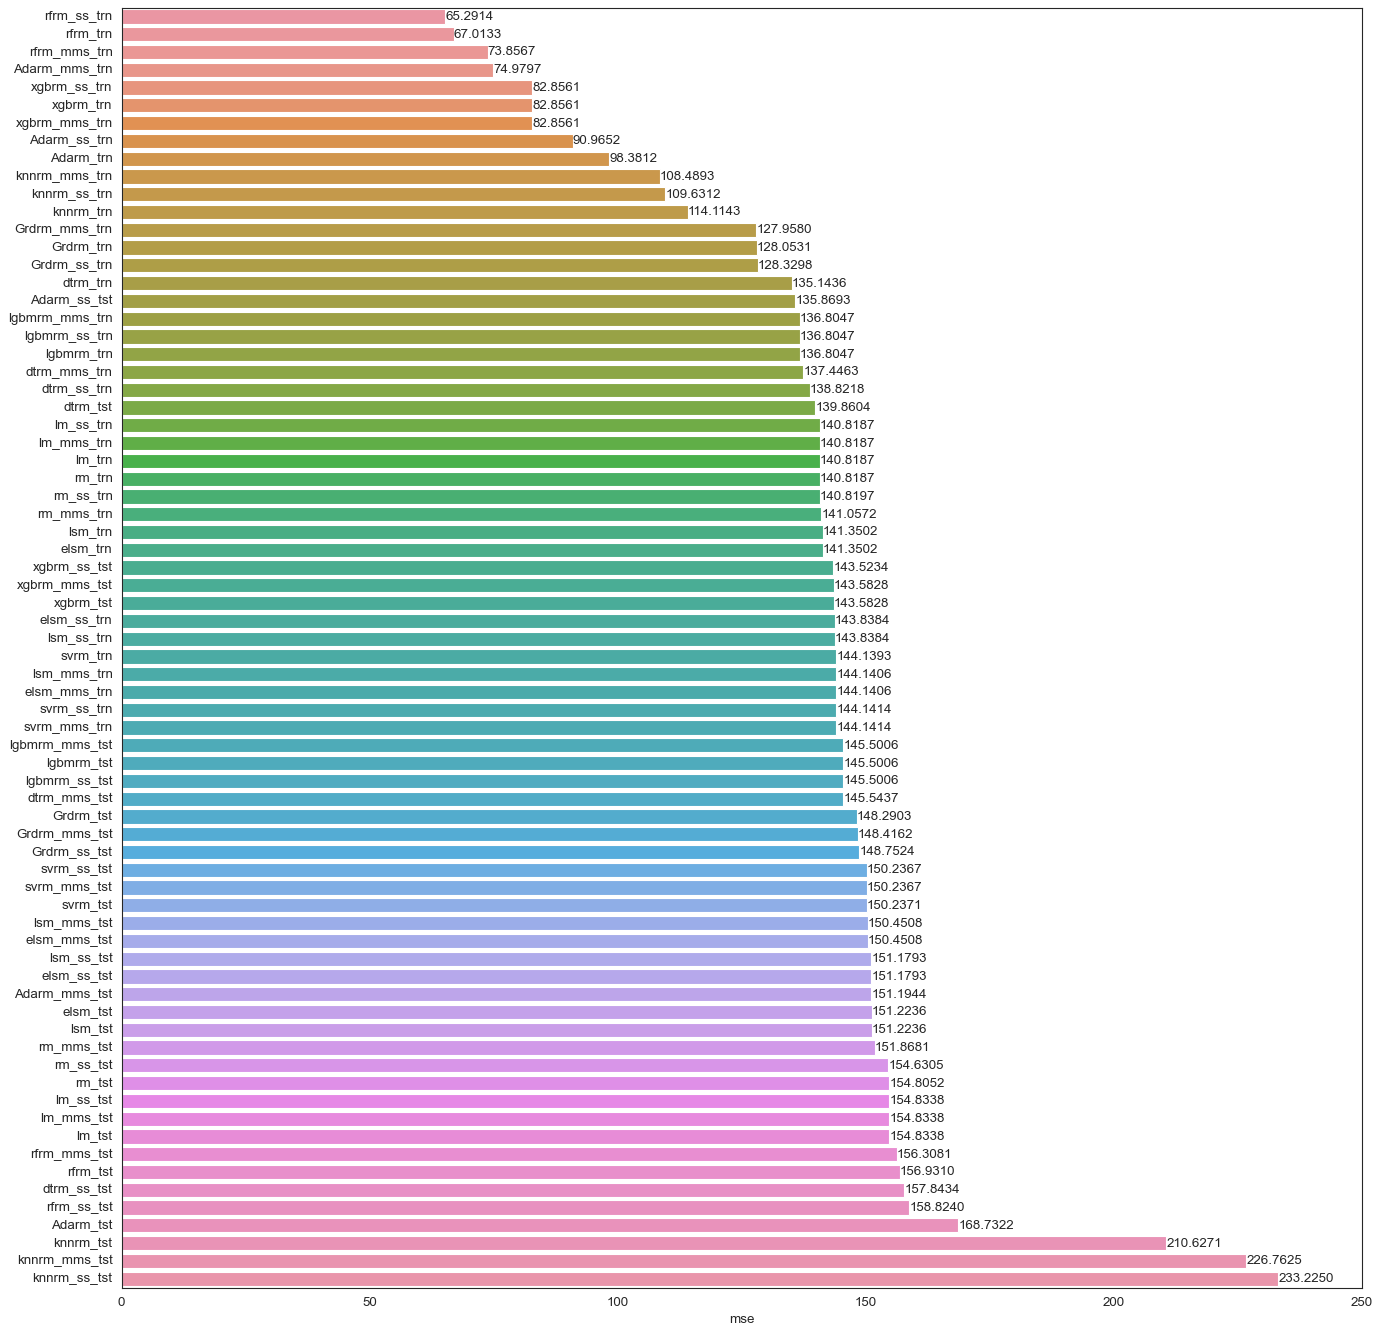

In [240]:
plt.style.use('classic')
sns.set_style("white")
metrics = all_scrs.columns
for i,j in enumerate(metrics):
    plt.figure(i, figsize=(20,20))
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = all_scrs.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 
plt.tight_layout;

## Final Model / Predict

In [242]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(max_depth=None,
                                    max_features="log2",
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    n_estimators=15)

final_model.fit(X_reg, y_reg)

RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=15)

In [243]:
columns_name = X_reg.columns

In [244]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [245]:
predictions = round(final_model.predict(pred_data)[0], 1)
predictions

72.9

In [246]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 72.9
Result		: Pilot
